In [1]:
import numpy as np
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../../common_code/')


from PostProcessingScripts import * 
from formation_channels import * 

import pandas as pd
from astropy import units as u
from astropy import constants as const

obtain index of the SFRD models that we want to highlight


In [13]:
def plot_formation_channels_redshift_rate_combined(whichplot='rate', DCOtype='BHNS'):
    """
    whichplot='rate', 'ratio'
    
    """

    
    adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other']
    
    DCOname = DCOname_dict[DCOtype]
    ncols, nrows = 1, 1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,6), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    
    for BPSmodelName in  BPSnameslist[:]:
        print(BPSmodelName)      
        # path for files 
        path_dir = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/'
        path_ = path_dir
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        full_data_path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(full_data_path,'r')
        rate_key = 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_formationChannels'
        redshifts                  = fdata[rate_key]['redshifts'][()] # Redshifts at which the rates were calculated
        channels_list                    = fdata[rate_key]['channel'][()] # Redshifts at which the rates were calculated
        channels_merger_rate_per_z = fdata[rate_key]['channels_merger_rate_per_z'][()]
        # always close the dataset
        fdata.close()


  
        for nrC, Channel in enumerate(adjustedChannelList): 

            ind_wanted = dictFormationChannelIndex[Channel]
            c_FC = channelColorDict[Channel]
            intrinsicRates = channels_merger_rate_per_z[ind_wanted] 

            # take ratio 
            if whichplot=='ratio':
                intrinsicRates = intrinsicRates/channels_merger_rate_per_z[-1]

            axe.plot(redshifts[:], intrinsicRates, color=c_FC, lw=3)

        if whichplot=='rate':
            # plot total rates         
            axe.plot(redshifts, channels_merger_rate_per_z[-1], color='k')


    
    #### plottnig things 
    axe.set_xlim(0,10)
    xlabel = r'\textbf{redshift} $z$'
    if whichplot=='ratio':
        ylabel = r'\textbf{fraction}'
        axe.set_ylim(0., 1)
    else:
        ylabel = r'\textbf{Rate} $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
        axe.set_ylim(0.01, 1000)
        
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=True)
    
    if whichplot!='ratio':
        axe.set_yscale('log') 
        
 
    
    plt.savefig('./redshift_rates_fc/FormationChannels_' + whichplot  + '_' + DCOtype +  '_' + 'combined' + '.png', dpi=100, transparent=False)#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')#, loc='upper center')    
    plt.show()
    
    
    return




at DCOtype = BHNS
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T


/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_37928/3894307193.py:43: RuntimeWarning: invalid value encountered in divide
  intrinsicRates = intrinsicRates/channels_merger_rate_per_z[-1]


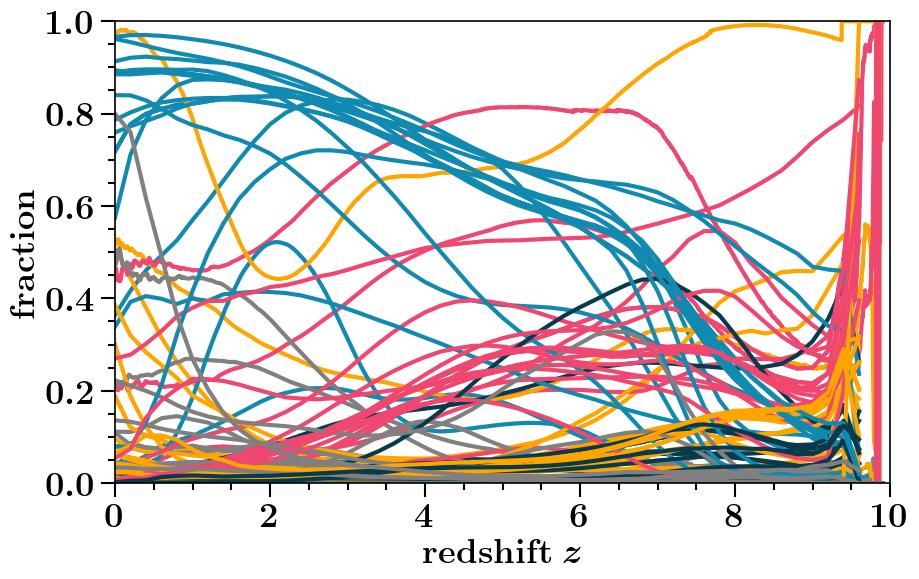

In [14]:
for DCOtype in [ 'BHNS',]:
    print()
    print('at DCOtype =', DCOtype)
    plot_formation_channels_redshift_rate_combined(whichplot='ratio', DCOtype=DCOtype)
    
    

    
    


at DCOtype = BHNS
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T


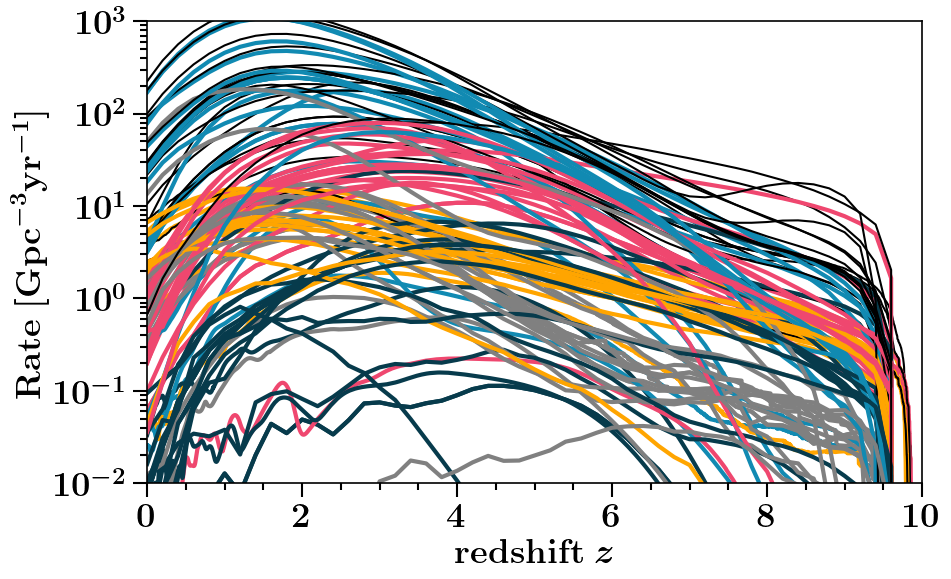

In [15]:
for DCOtype in [ 'BHNS',]:
    print()
    print('at DCOtype =', DCOtype)
    plot_formation_channels_redshift_rate_combined(whichplot='rate', DCOtype=DCOtype)
    
    

In [78]:
def plot_formation_channels_redshift_rate_stacked(axe='None', DCOtype='BHNS', \
                                          BPSmodelName='A'):
    """
    whichplot='rate', 'ratio'
    
    """

    
    adjustedChannelList = ['classic', 'stable B no CEE', 'vii', 'immediate CE',  r'double-core CE', 'other']
    
    DCOname = DCOname_dict[DCOtype]

    # path for files 
    path_dir = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/'
    path_ = path_dir
    path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
    full_data_path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    print(full_data_path)
    # read in data 
    fdata = h5.File(full_data_path,'r')
    print(fdata.keys())
    rate_key = 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_formationChannels'
    redshifts                  = fdata[rate_key]['redshifts'][()] # Redshifts at which the rates were calculated
    channels_list                    = fdata[rate_key]['channel'][()] # Redshifts at which the rates were calculated
    channels_merger_rate_per_z = fdata[rate_key]['channels_merger_rate_per_z'][()]
    
    # always close the dataset
    fdata.close()
    
    total_rates = channels_merger_rate_per_z[-1]
    intrinsicRates = np.zeros_like(redshifts)
    

    for nrC, Channel in enumerate(adjustedChannelList): 
        
        ind_wanted = dictFormationChannelIndex[Channel]
#         print('now at channel: ', Channel, 'ind wanted ', ind_wanted)
        c_FC = channelColorDict[Channel]
#         print((channels_merger_rate_per_z[ind_wanted])[:10])
#         print(total_rates[:10])
        channelRates = np.divide(channels_merger_rate_per_z[ind_wanted], \
                                 total_rates, out=np.zeros_like(total_rates), where=total_rates!=0)
    
    

# #         intrinsicRates = intrinsicRates
        
        axe.fill_between(redshifts[:], y1=intrinsicRates, y2=intrinsicRates+channelRates, color=c_FC)
        intrinsicRates+=channelRates
        
#     if whichplot=='rate':
#         # plot total rates         
#         axe.plot(redshifts, channels_merger_rate_per_z[-1], color='k')


    axe.set_xlim(0,10)
    xlabel = r'\textbf{redshift} $z$'
    ylabel = r'\textbf{fraction}'
#     axe.set_ylim(0., 1)

        
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=True)
    
    return axe




at DCOtype = BNS
I
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha2_0/COMPASCompactOutput_BNS_I.h5
<KeysViewHDF5 ['RLOF', 'commonEnvelopes', 'doubleCompactObjects', 'formationChannels', 'supernovae', 'systems', 'weights_detected', 'weights_detectedPerRedshift', 'weights_intrinsic', 'weights_intrinsicPerRedshift']>


KeyError: "Unable to open object (object 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_formationChannels' doesn't exist)"

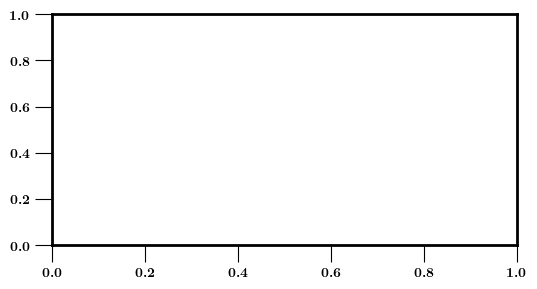

In [79]:
ncols, nrows = 1, 1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(6,3), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

for DCOtype in [ 'BNS',]:
    print()
    print('at DCOtype =', DCOtype)

    for BPSmodelName in  [BPSnameslist[8]]:
        print(BPSmodelName)





        axe = plot_formation_channels_redshift_rate_stacked(axe=axe, DCOtype=DCOtype, BPSmodelName=BPSmodelName ) 
        plt.savefig('./redshift_rates_fc/FormationChannels_' + 'stacked'  + '_' + DCOtype +  '_' + BPSmodelName + '.png', dpi=100, transparent=False)#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')#, loc='upper center')    
        plt.show()

In [48]:

def make_up_axis(axe=None, axe_ind=0, BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):
    for ind_bps, bps_name in enumerate(BPSnameslist):
        
        axe = ax[ind_bps, axe_ind]
#         if ind_bps 

                
        if logY==True:
            axe.set_yscale('log')
        if logX==True:
            axe.set_xscale('log')
        if xlim:
            axe.set_xlim(xlim[0], xlim[1])
        if ylim:
            axe.set_ylim(ylim[0], ylim[1])
        
        if bps_name != BPSmodelNames[-1]:
            
            axe.set_xticklabels( () )
            axe.set_xticks([])

            axe.set_yticks([])
            axe.set_yticklabels( () )
            
        
        
        
        
        if  (nameX==None):

            axe.set_xticklabels( () )
            axe.set_xticks([])

        elif (nameY==None):
            axe.set_yticks([])
            axe.set_yticklabels( () )   
            
            
#         if (nameX!=None) & (nameY==None):
#             layoutAxesNoYlabel()

    return 





def make_up_axis_single_ax(axe=None, bps_name='A', BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):

#         if ind_bps 


    if logY==True:
        axe.set_yscale('log')
    if logX==True:
        axe.set_xscale('log')
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])

#     if bps_name != BPSmodelNames[-1]:

#         axe.set_xticklabels( () )
#         axe.set_xticks([])

#         axe.set_yticks([])
#         axe.set_yticklabels( () )




#     else:
    if  (nameX==None):
        axe.set_xticklabels( () )
        axe.set_xticks([])

    elif (nameY==None):
        axe.set_yticks([])
        axe.set_yticklabels( () )   




    return 

def layoutAxesNoXlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True, rotation=0):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    # ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad, rotation=rotation, va="center")#, fontweight='bold')    




    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax




at DCOtype = BHNS
/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_A.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_25/COMPASCompactOutput_BHNS_B.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_5/COMPASCompactOutput_BHNS_C.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_75/COMPASCompactOutput_BHNS_D.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BHNS_E.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BHNS_F.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha0_1/COMPASCompactOutput_BHNS_G.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha0_5/COMPASCompactOutput_BHNS_H.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha2_0/COMPASCompactOutput_BHNS_I.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha10/COMPASCompactOutput_BHNS_J.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_K.h5
/Volumes/Andromeda2/DATA/AllDCO_bugfix/ra

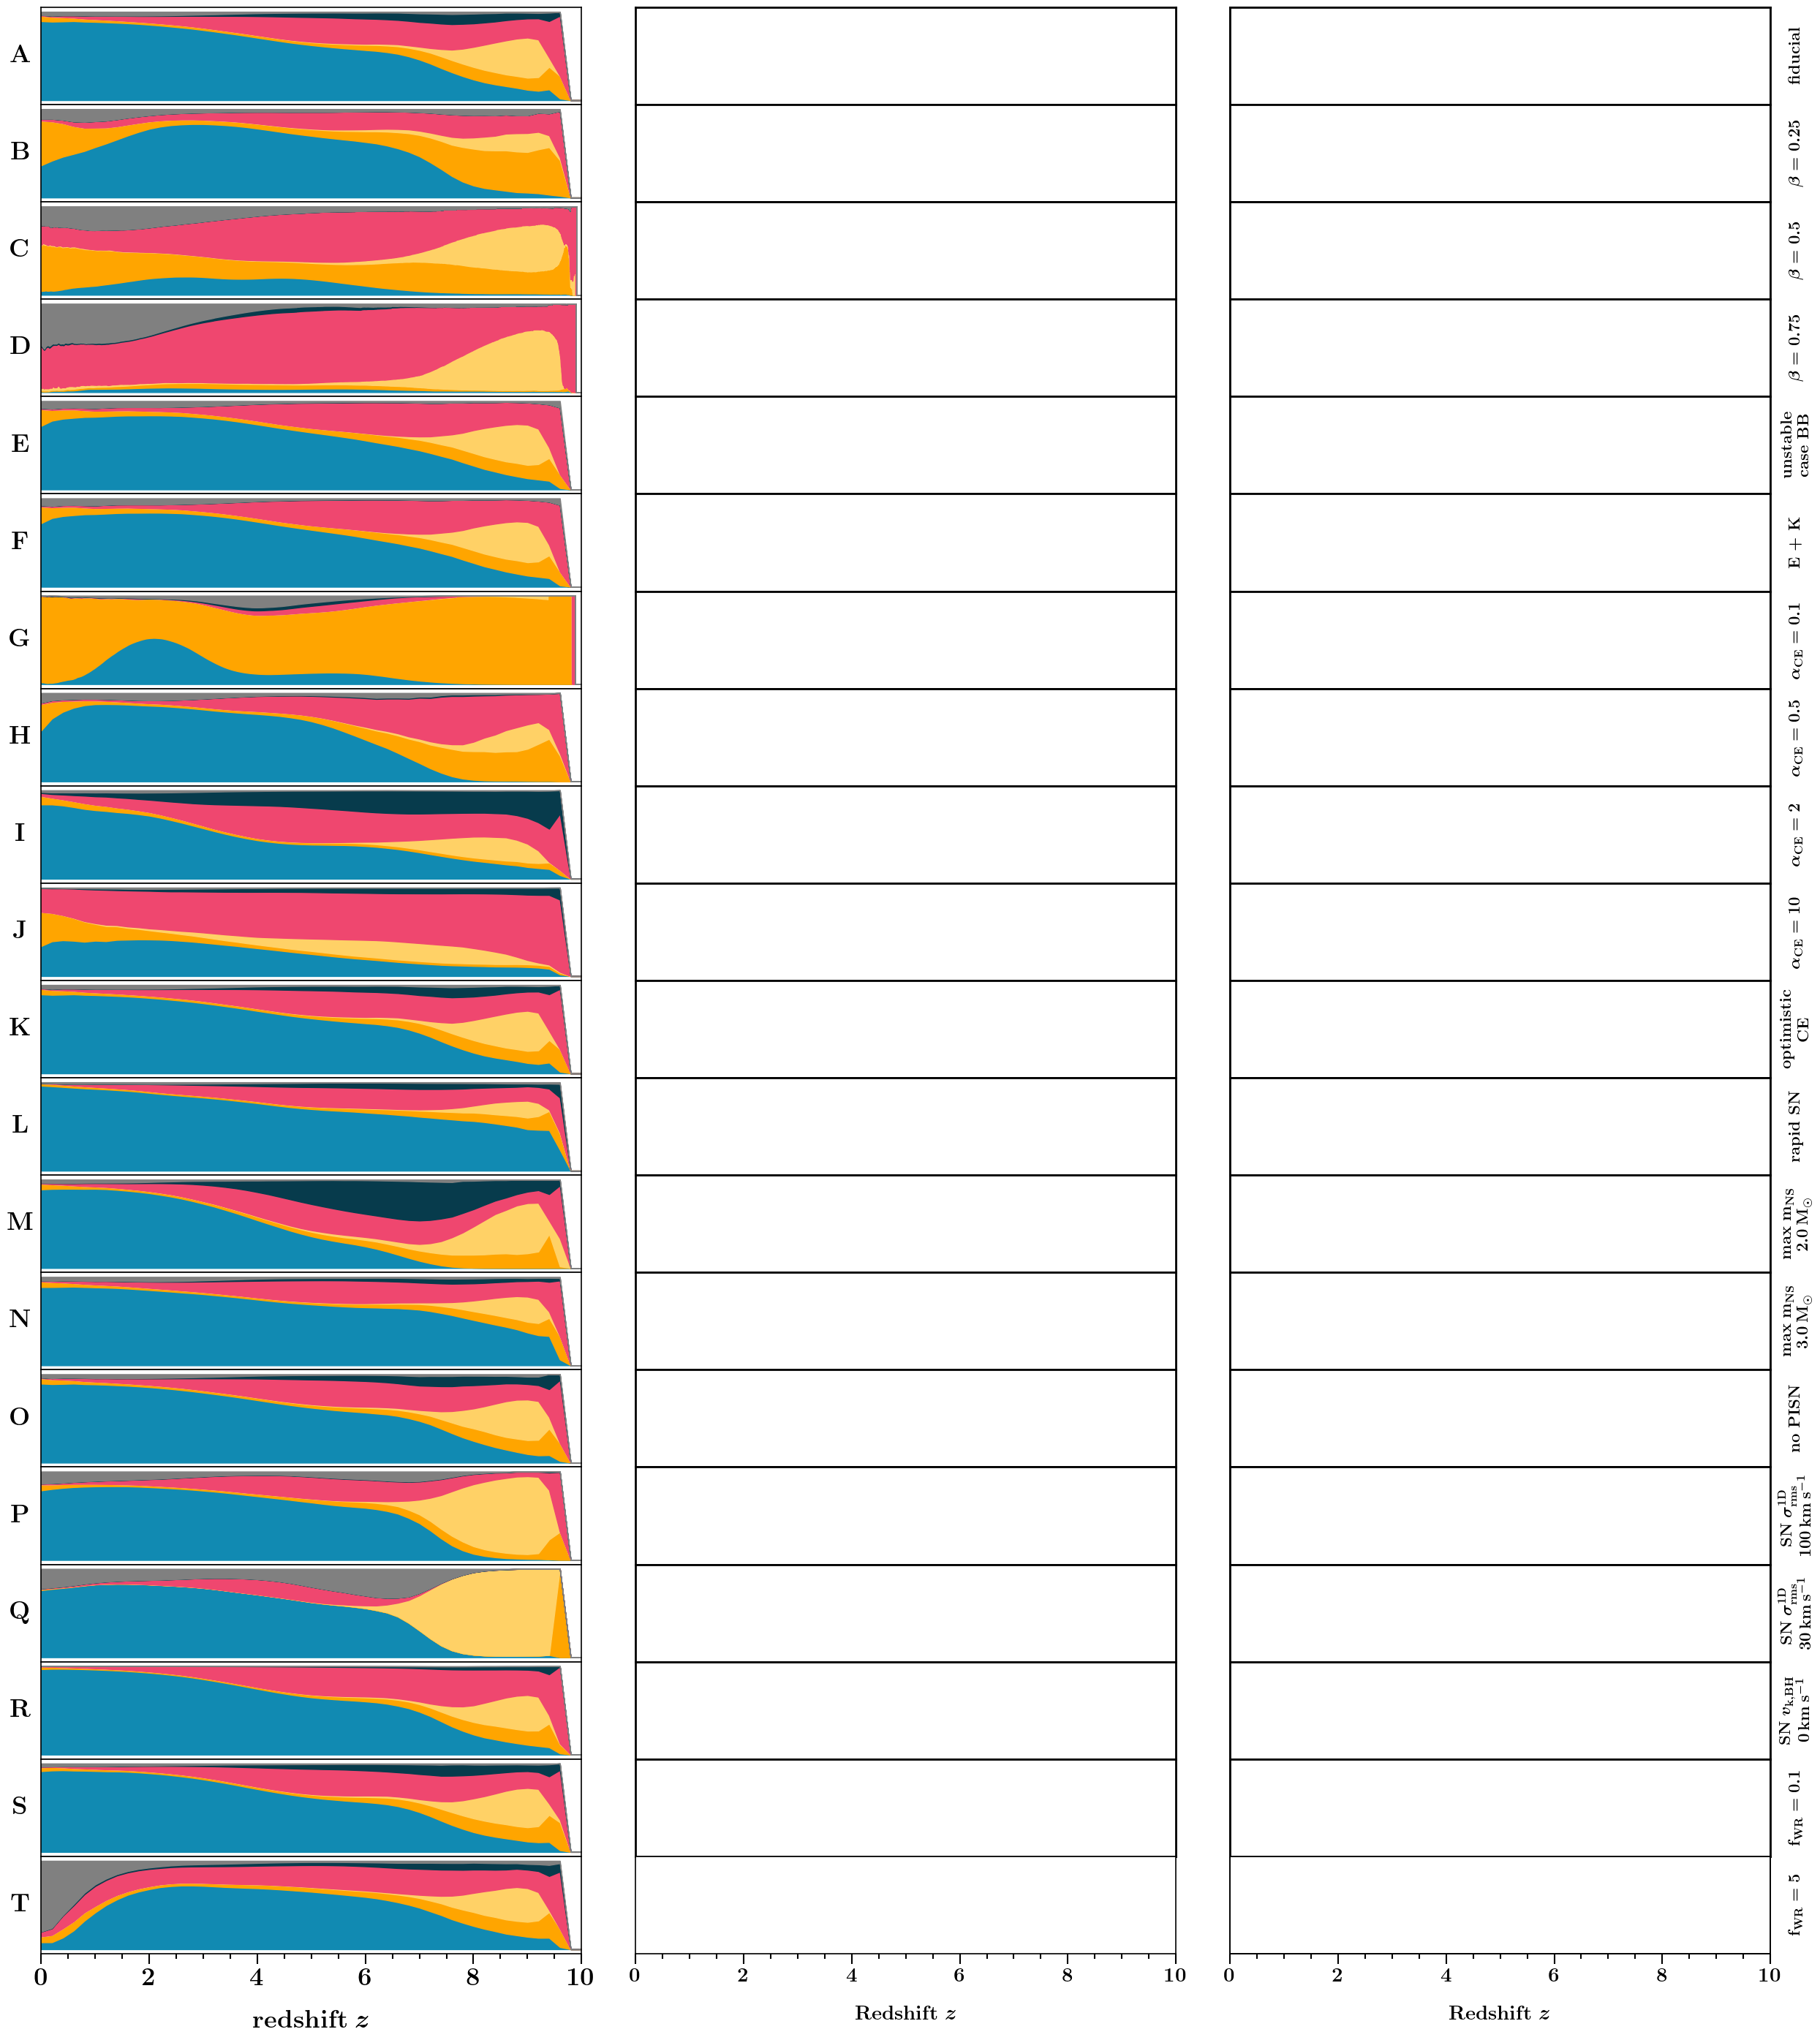

In [76]:

ncols, nrows= 3,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(25,28), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

fs_t = 20




for axe_ind in range(3):
    # FIRST COLUMN WITH CHIRP MASS ###
    xparam, axe_ind, xlabelname ='ChirpMass', axe_ind,  r' \textbf{Redshift} $z$ ' 
    xlim=[0.0,10]
    make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
    layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)


    
# for ind_dco, DCOtype in enumerate([ 'BHNS','BNS']):
for ind_dco, DCOtype in enumerate([ 'BHNS','BNS']):
    print()
    print('at DCOtype =', DCOtype)

    for ind_bps, bps_name in enumerate(BPSnameslist):

        ax[ind_bps,ind_dco] = plot_formation_channels_redshift_rate_stacked(axe=ax[ind_bps,0], DCOtype=DCOtype, BPSmodelName=bps_name) 

    
# xlim, ylim=[0,10], [0,1]
# make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# # top label 
# ax2x = ax[0,axe_ind].twiny()
# make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)


# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,0], nameX=None, nameY=nameY, labelpad=20, rotation=0)


# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,2].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=16)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)  
plt.savefig('./redshift_rates_fc/ratesz'  + '.png', transparent=False)
plt.savefig('./redshift_rates_fc/ratesz'  + '.pdf', transparent=False)
plt.show()
plt.close()


In [74]:
nModels=20 # 
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
print(BPSnameslist)
print(list(range(20)))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [9]:
def plot_formation_channels_redshift_rate(whichplot='rate', DCOtype='BHNS', \
                                          BPSmodelName='A'):
    """
    whichplot='rate', 'ratio'
    
    """

    
    adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other']
    
    DCOname = DCOname_dict[DCOtype]

    # path for files 
    path_dir = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/'
    path_ = path_dir
    path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
    full_data_path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    print(full_data_path)
    # read in data 
    fdata = h5.File(full_data_path,'r')
    rate_key = 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_formationChannels'
    redshifts                  = fdata[rate_key]['redshifts'][()] # Redshifts at which the rates were calculated
    channels_list                    = fdata[rate_key]['channel'][()] # Redshifts at which the rates were calculated
    channels_merger_rate_per_z = fdata[rate_key]['channels_merger_rate_per_z'][()]
    # always close the dataset
    fdata.close()
    
    ncols, nrows = 1, 1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,6), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    
    for nrC, Channel in enumerate(adjustedChannelList): 
        
        
        ind_wanted = dictFormationChannelIndex[Channel]
        print('now at channel: ', Channel, 'ind wanted ', ind_wanted)
        c_FC = channelColorDict[Channel]
        intrinsicRates = channels_merger_rate_per_z[ind_wanted] 
        
        # take ratio 
        if whichplot=='ratio':
            intrinsicRates = intrinsicRates/channels_merger_rate_per_z[-1]
        
        axe.plot(redshifts[:], intrinsicRates, color=c_FC, lw=3)
        
    if whichplot=='rate':
        # plot total rates         
        axe.plot(redshifts, channels_merger_rate_per_z[-1], color='k')


    axe.set_xlim(0,10)
    xlabel = r'\textbf{redshift} $z$'
    if whichplot=='ratio':
        ylabel = r'\textbf{fraction}'
        axe.set_ylim(0., 1)
    else:
        ylabel = r'\textbf{Rate} $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
        axe.set_ylim(0.01, 1000)
        
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=True)
    
    if whichplot!='ratio':
        axe.set_yscale('log') 
        
 
    
    plt.savefig('./redshift_rates_fc/FormationChannels_' + whichplot  + '_' + DCOtype +  '_' + BPSmodelName + '.png', dpi=100, transparent=False)#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')#, loc='upper center')    
    plt.show()
    
    
    return




at DCOtype = BHNS
A
/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_A.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_37928/383958833.py:43: RuntimeWarning: invalid value encountered in divide
  intrinsicRates = intrinsicRates/channels_merger_rate_per_z[-1]


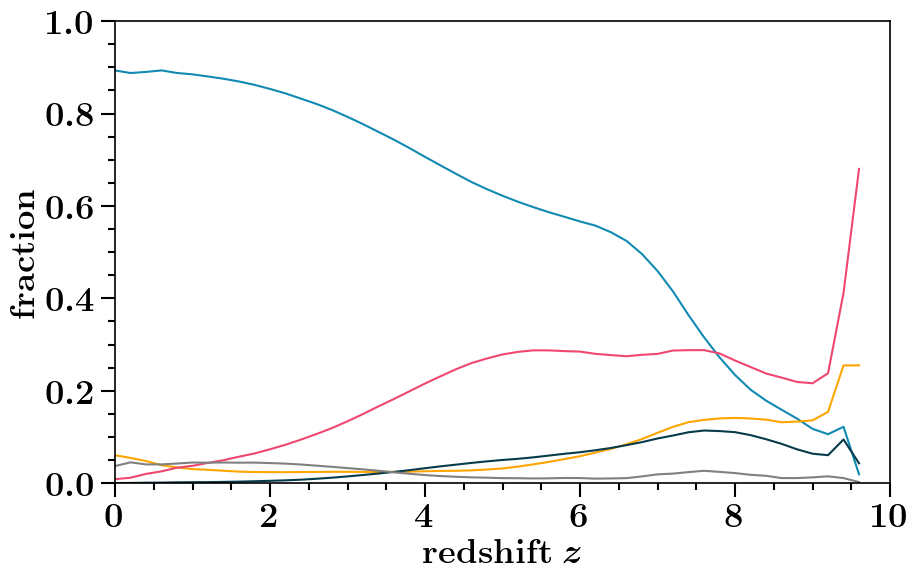

B
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_25/COMPASCompactOutput_BHNS_B.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


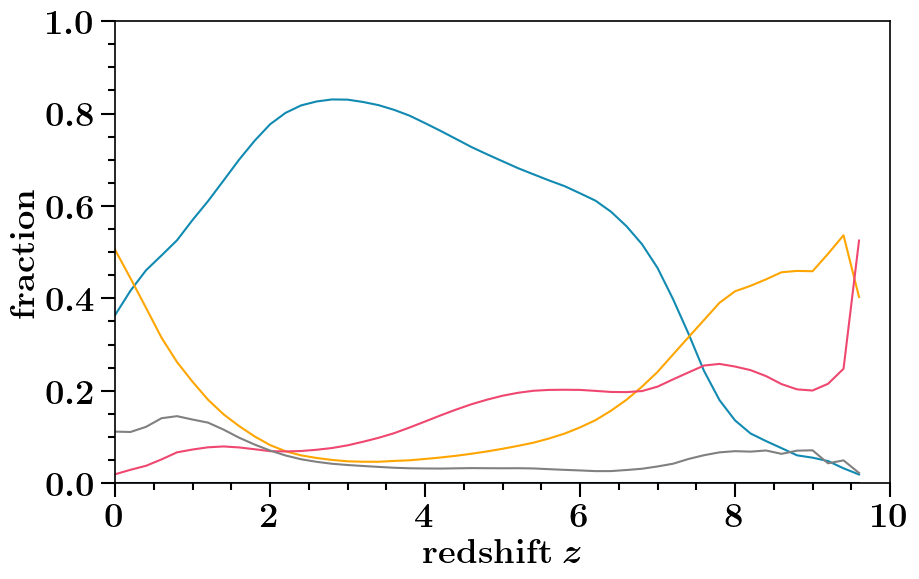

C
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_5/COMPASCompactOutput_BHNS_C.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


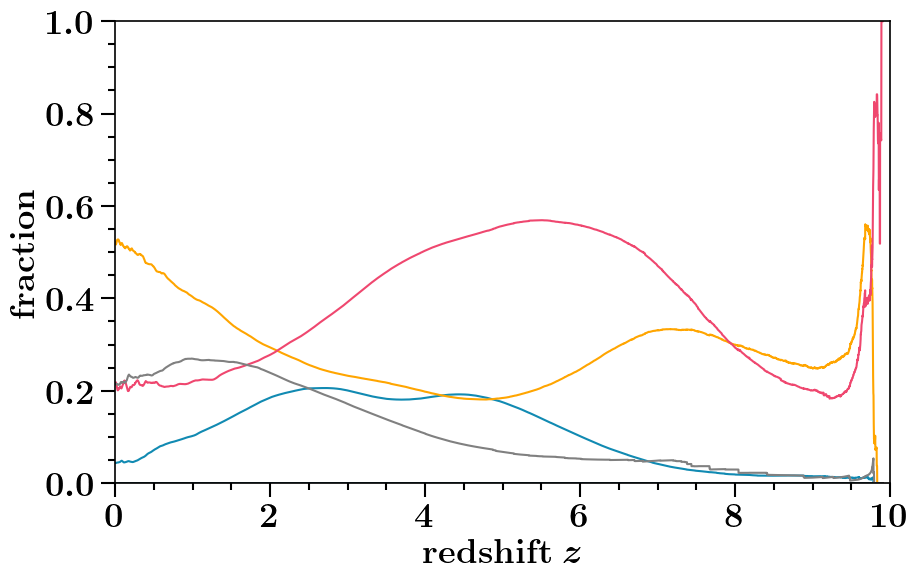

D
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_75/COMPASCompactOutput_BHNS_D.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


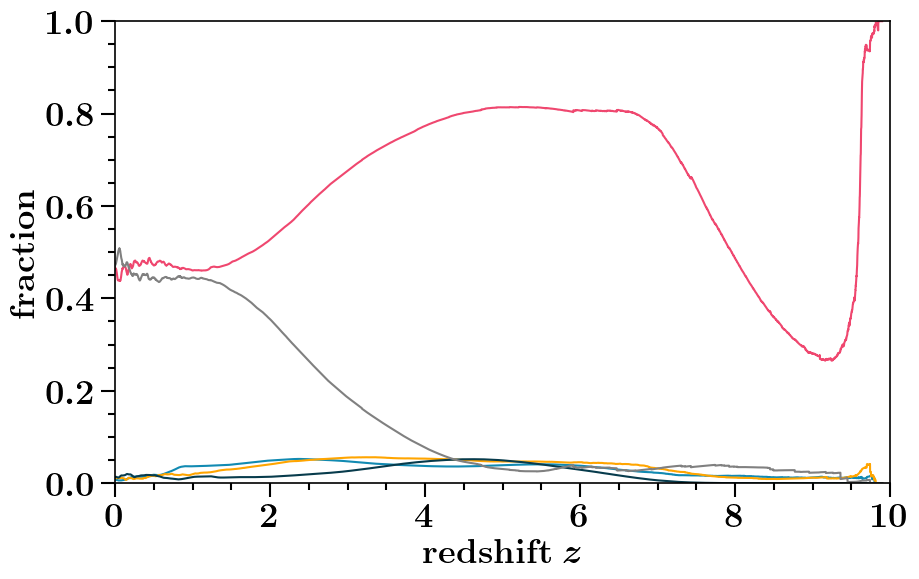

E
/Volumes/Andromeda2/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BHNS_E.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


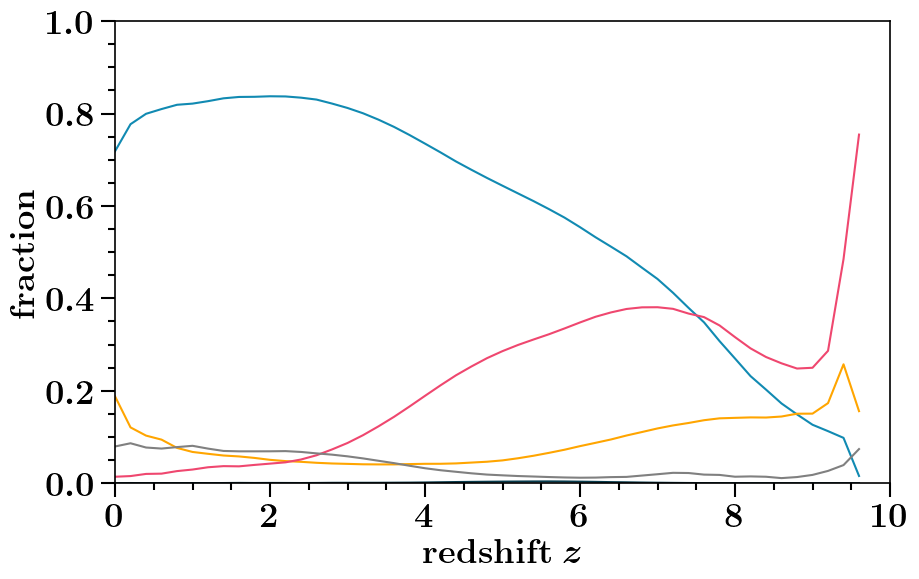

F
/Volumes/Andromeda2/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BHNS_F.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


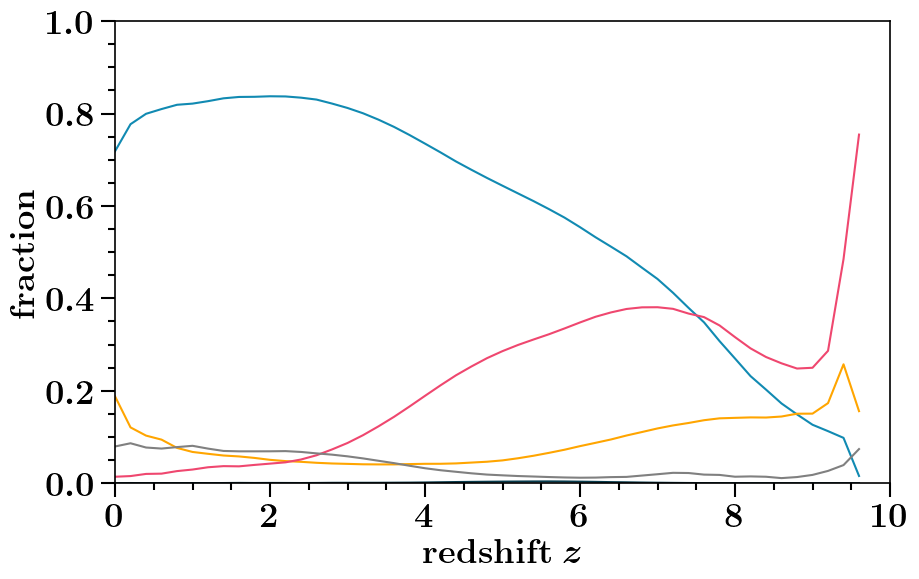

G
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha0_1/COMPASCompactOutput_BHNS_G.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


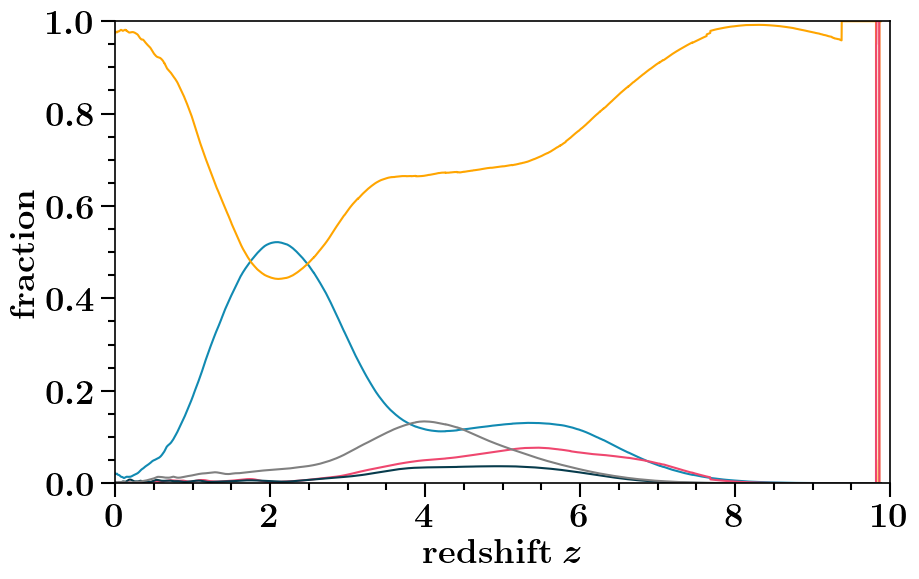

H
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha0_5/COMPASCompactOutput_BHNS_H.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


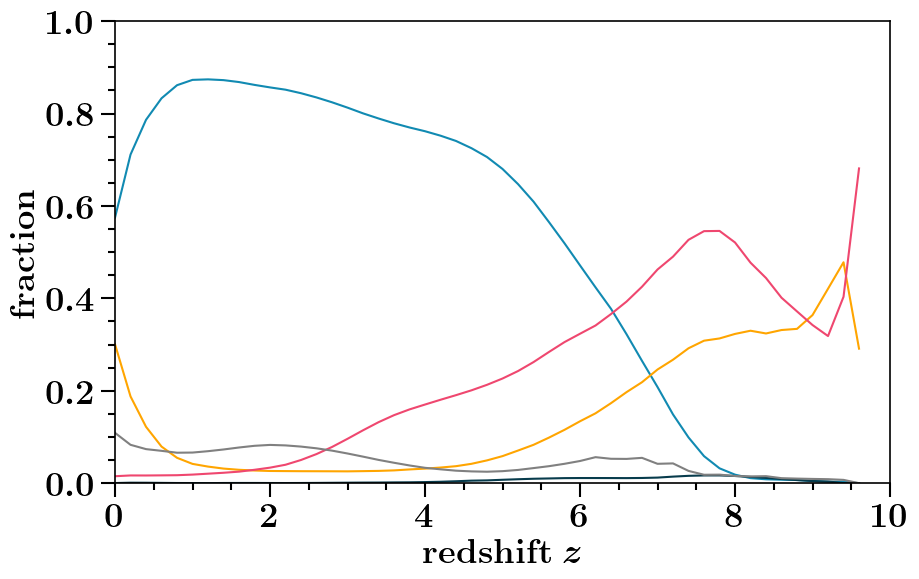

I
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha2_0/COMPASCompactOutput_BHNS_I.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


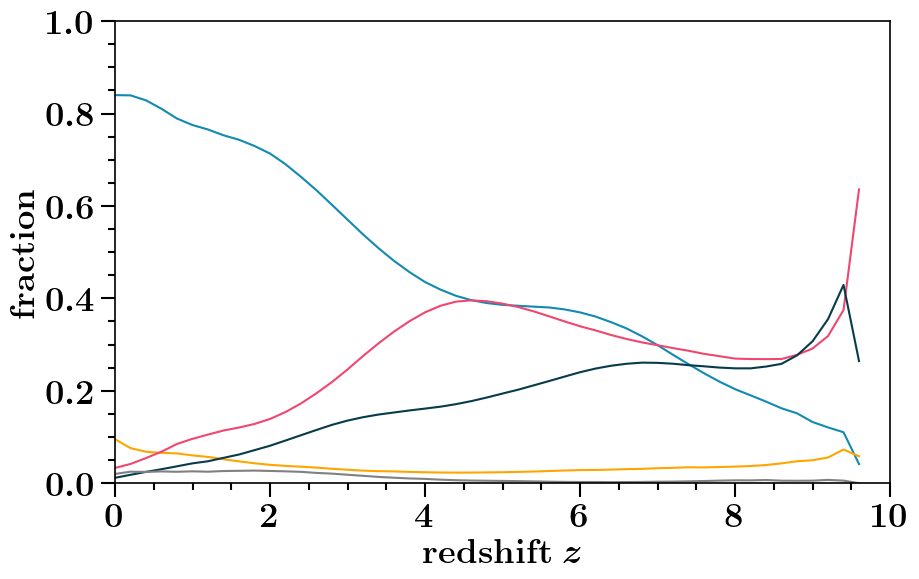

J
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha10/COMPASCompactOutput_BHNS_J.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


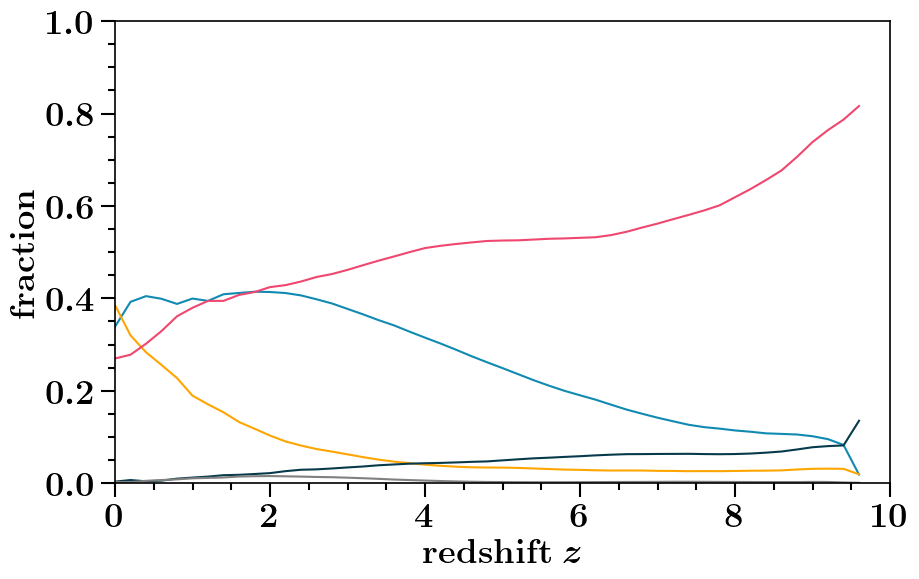

K
/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_K.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


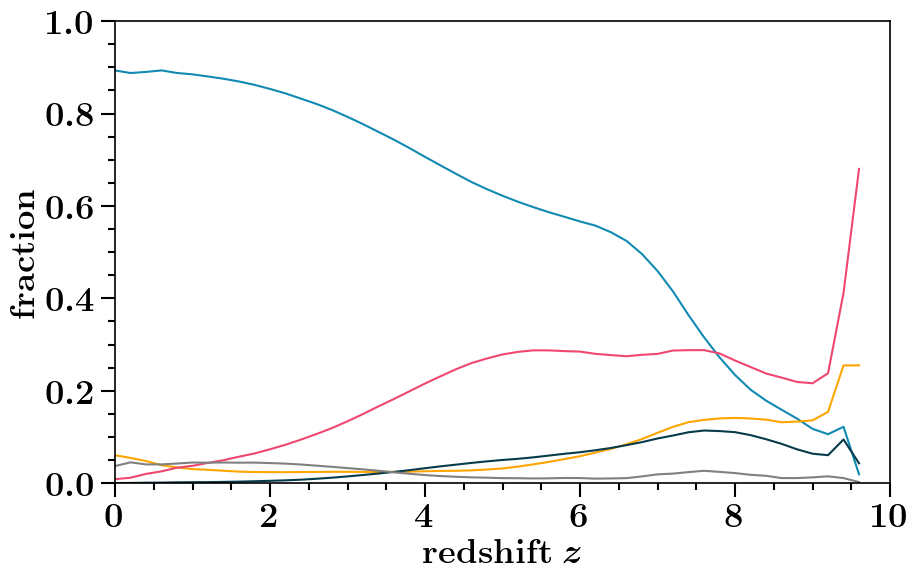

L
/Volumes/Andromeda2/DATA/AllDCO_bugfix/rapid/COMPASCompactOutput_BHNS_L.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


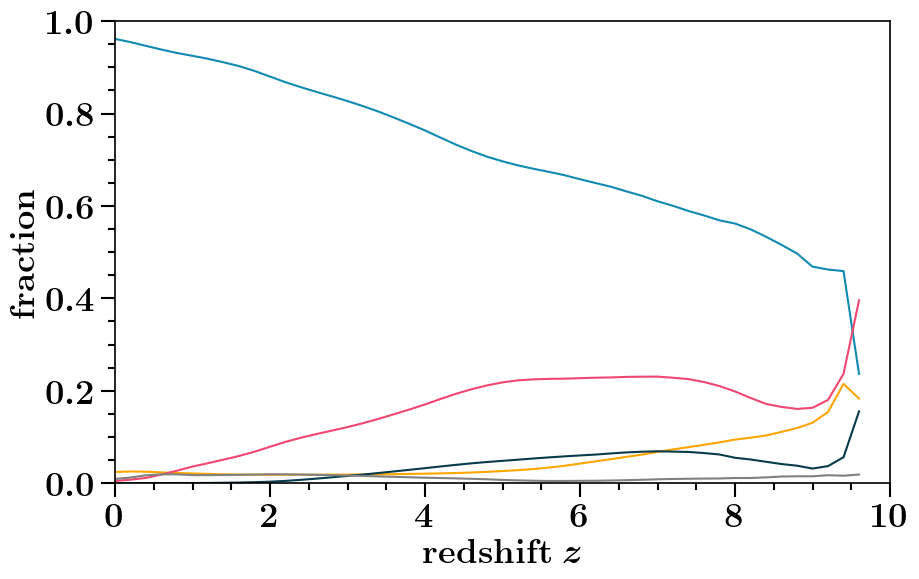

M
/Volumes/Andromeda2/DATA/AllDCO_bugfix/maxNSmass2_0/COMPASCompactOutput_BHNS_M.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


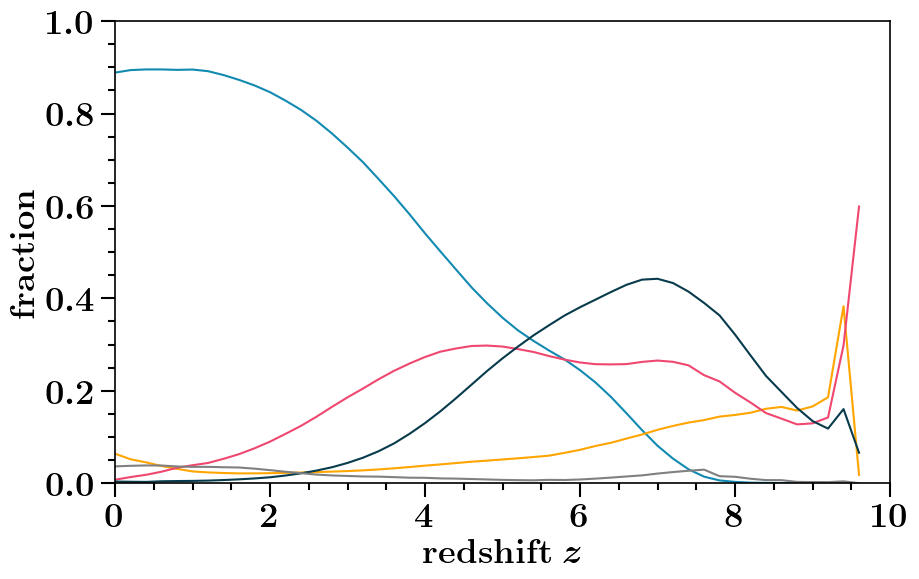

N
/Volumes/Andromeda2/DATA/AllDCO_bugfix/maxNSmass3_0/COMPASCompactOutput_BHNS_N.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


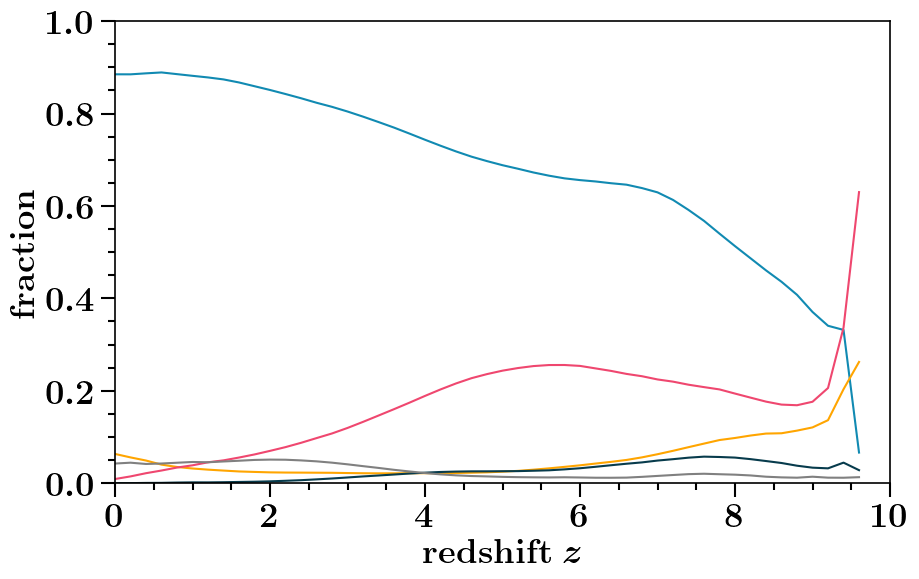

O
/Volumes/Andromeda2/DATA/AllDCO_bugfix/noPISN/COMPASCompactOutput_BHNS_O.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


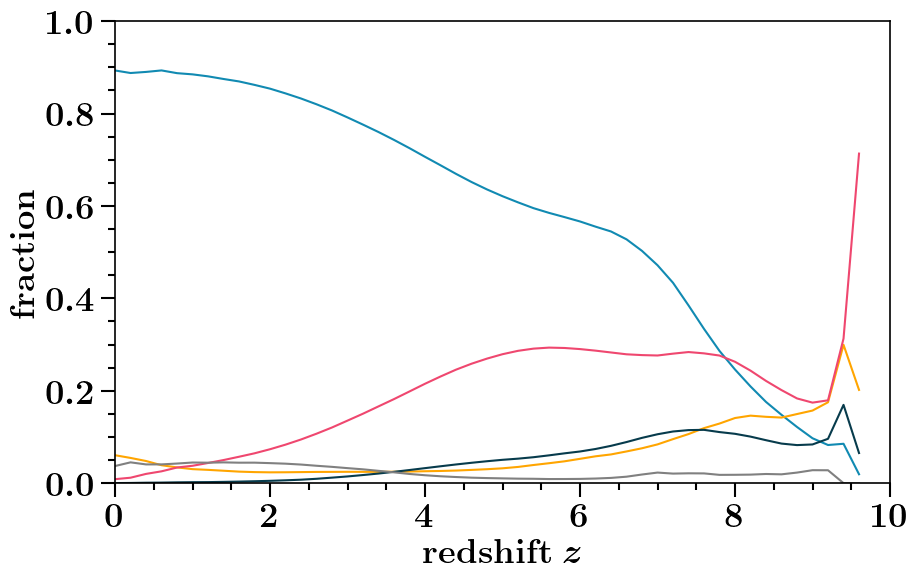

P
/Volumes/Andromeda2/DATA/AllDCO_bugfix/ccSNkick_100km_s/COMPASCompactOutput_BHNS_P.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


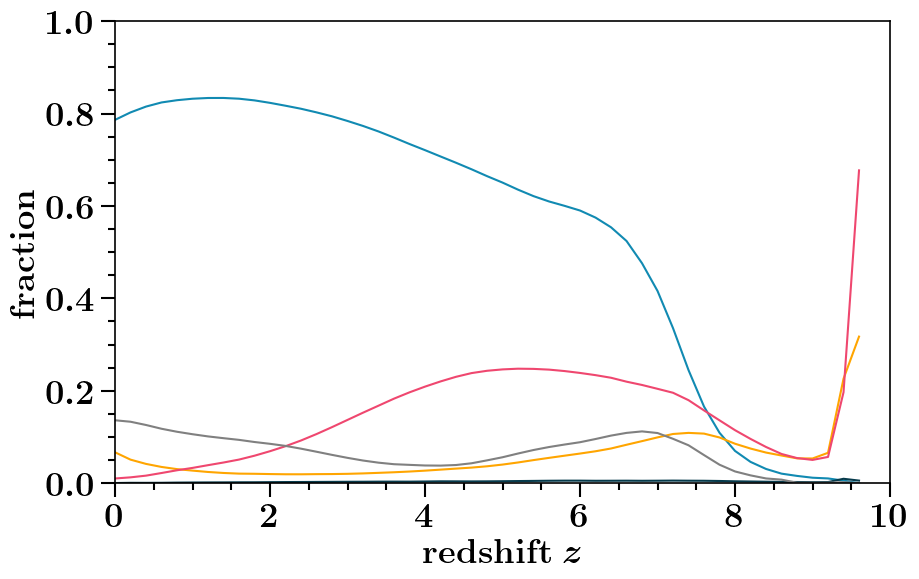

Q
/Volumes/Andromeda2/DATA/AllDCO_bugfix/ccSNkick_30km_s/COMPASCompactOutput_BHNS_Q.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


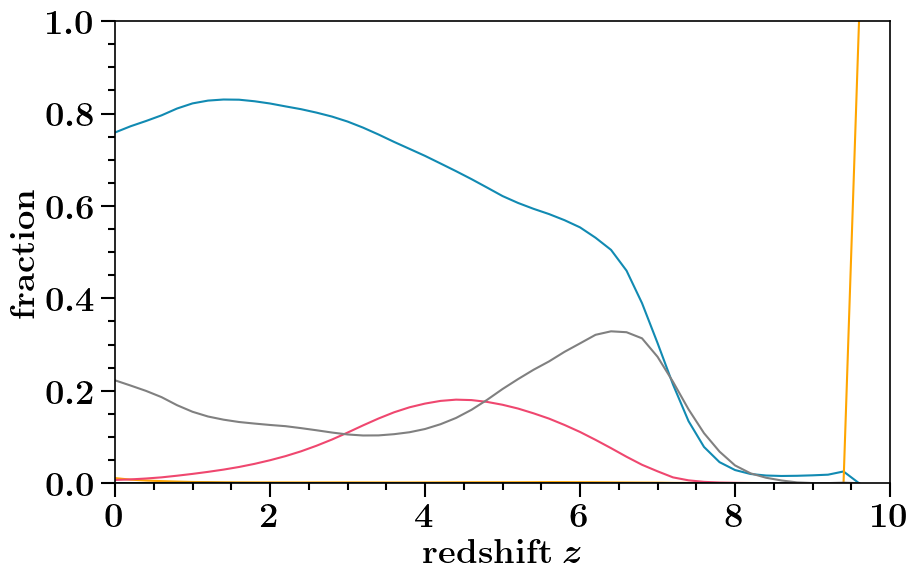

R
/Volumes/Andromeda2/DATA/AllDCO_bugfix/noBHkick/COMPASCompactOutput_BHNS_R.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


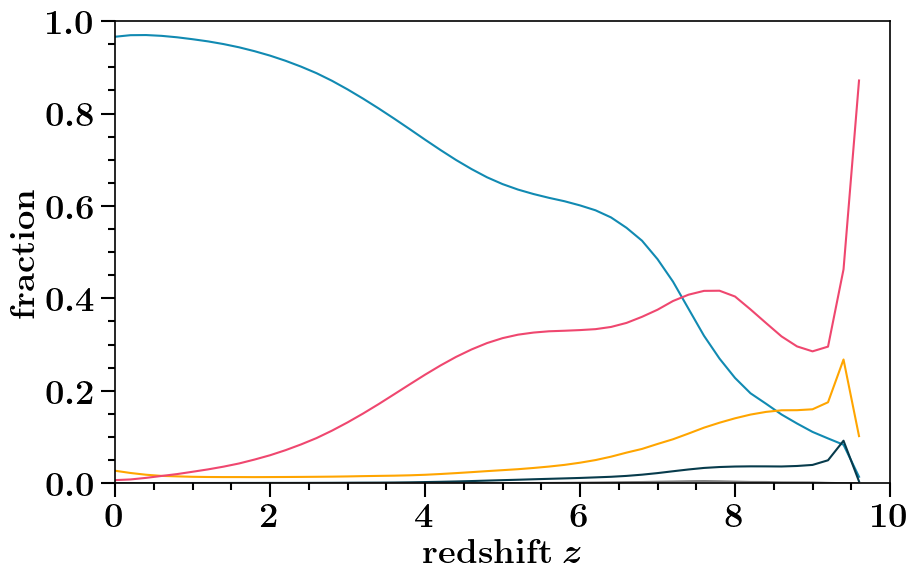

S
/Volumes/Andromeda2/DATA/AllDCO_bugfix/wolf_rayet_multiplier_0_1/COMPASCompactOutput_BHNS_S.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


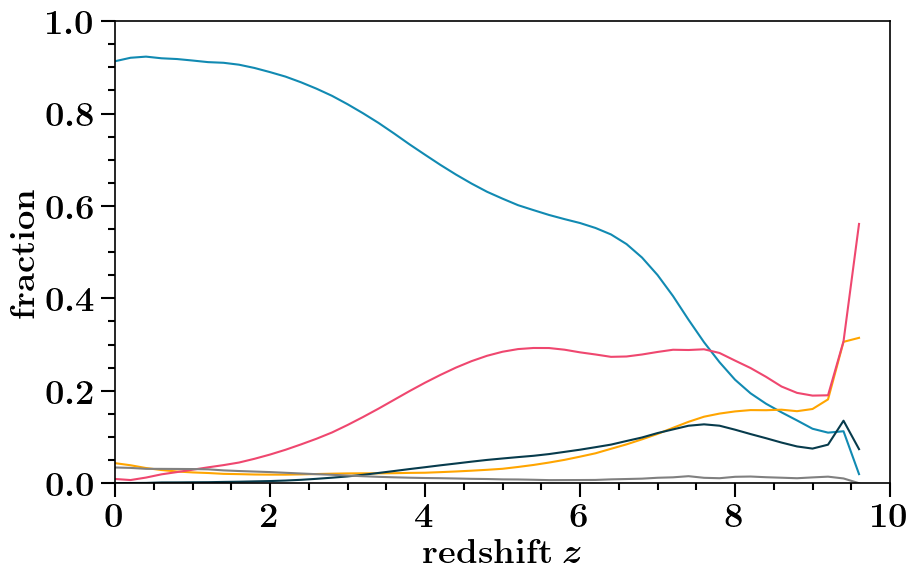

T
/Volumes/Andromeda2/DATA/AllDCO_bugfix/wolf_rayet_multiplier_5/COMPASCompactOutput_BHNS_T.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


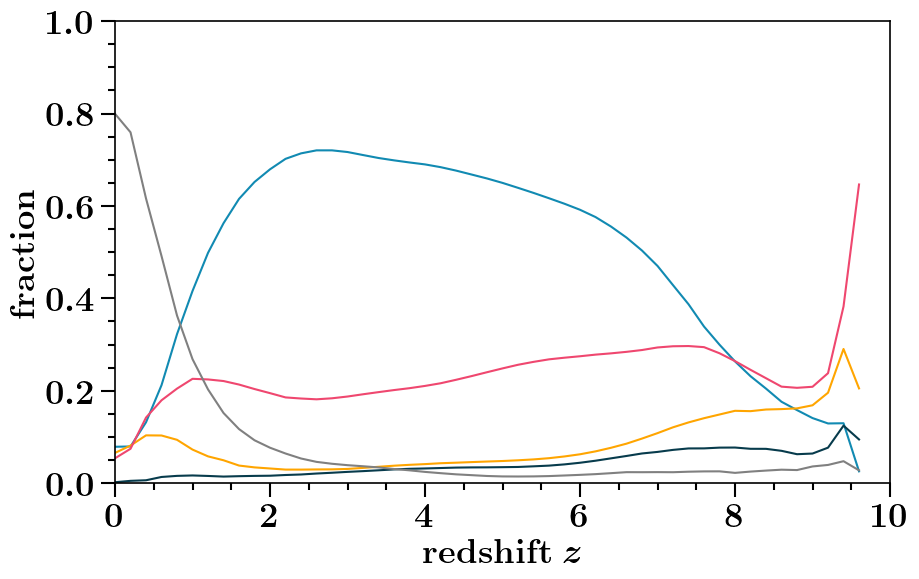

In [10]:
for DCOtype in [ 'BHNS',]:
    print()
    print('at DCOtype =', DCOtype)

    for BPSmodelName in  BPSnameslist[:]:
        print(BPSmodelName)


        plot_formation_channels_redshift_rate(whichplot='ratio', DCOtype=DCOtype, BPSmodelName=BPSmodelName)



at DCOtype = BHNS
A
/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_A.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


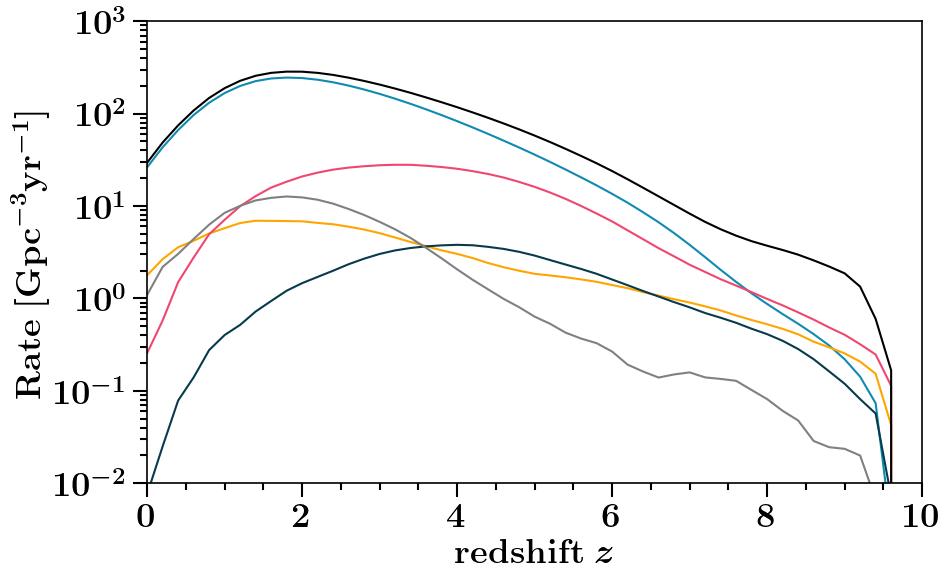

B
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_25/COMPASCompactOutput_BHNS_B.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


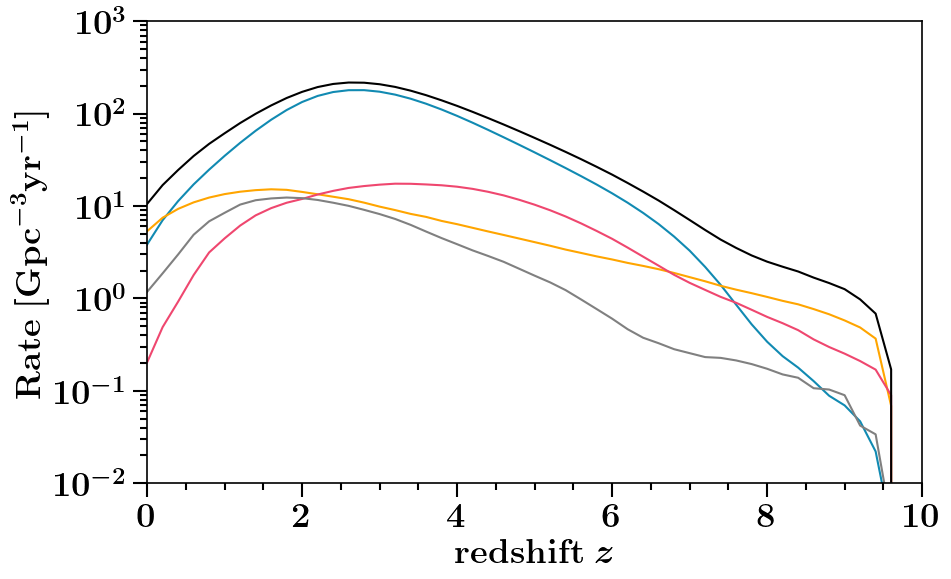

C
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_5/COMPASCompactOutput_BHNS_C.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


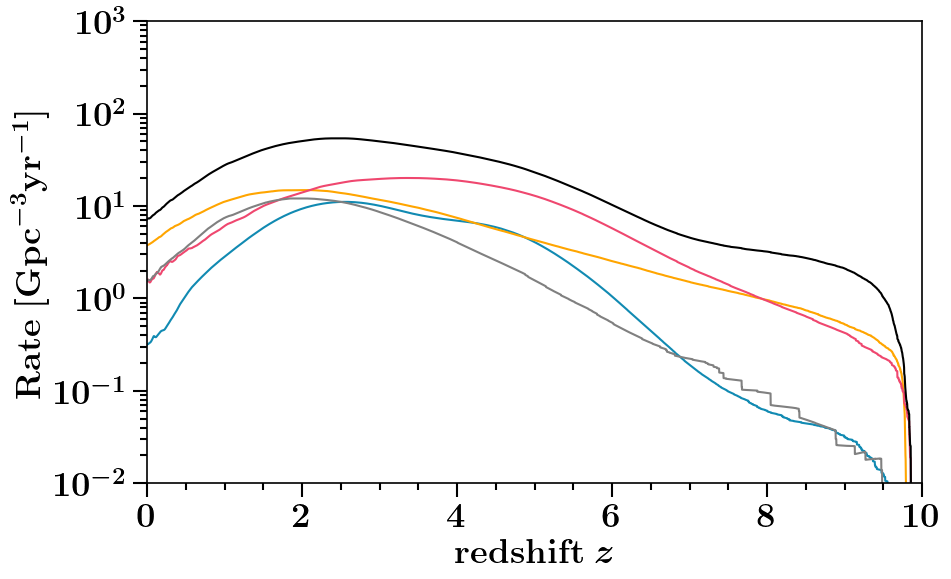

D
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_75/COMPASCompactOutput_BHNS_D.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


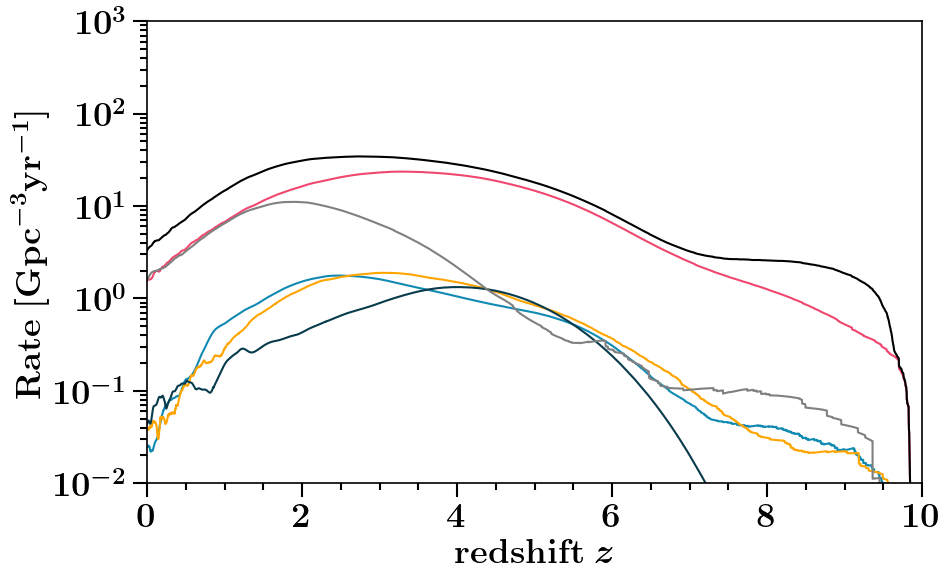

E
/Volumes/Andromeda2/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BHNS_E.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


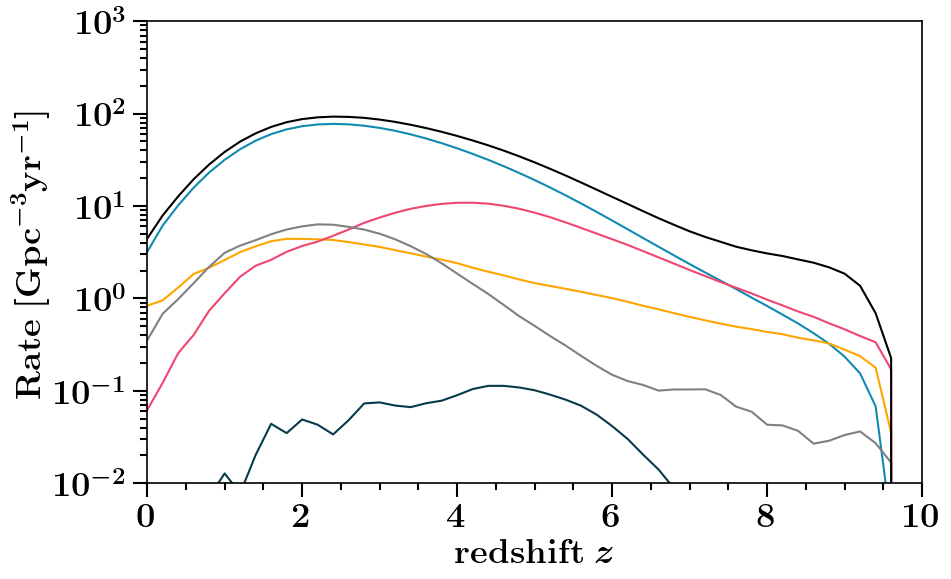

F
/Volumes/Andromeda2/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BHNS_F.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


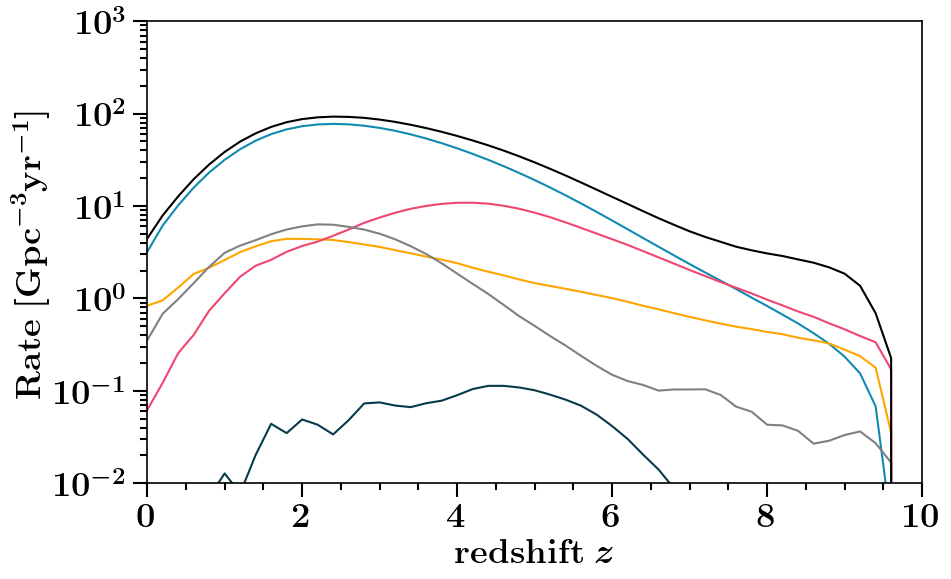

G
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha0_1/COMPASCompactOutput_BHNS_G.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


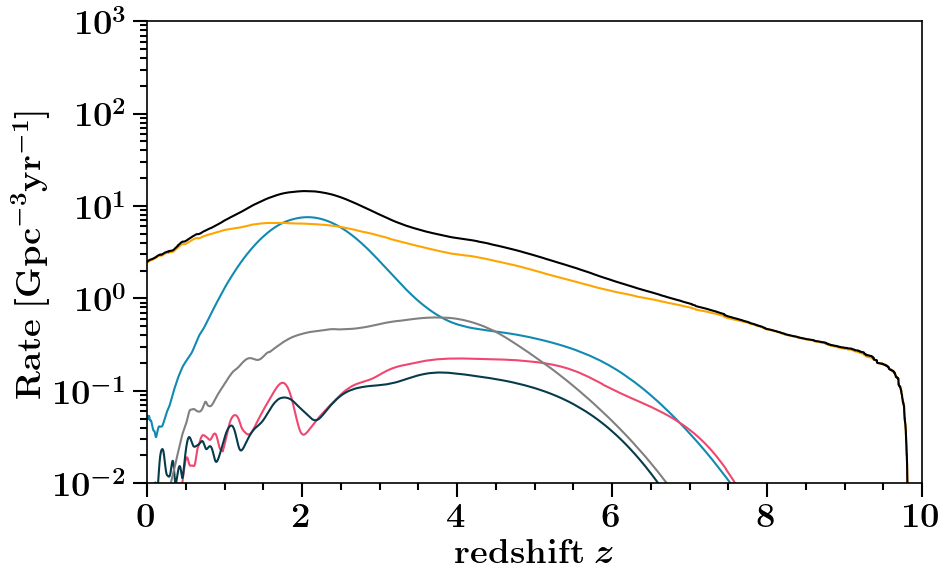

H
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha0_5/COMPASCompactOutput_BHNS_H.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


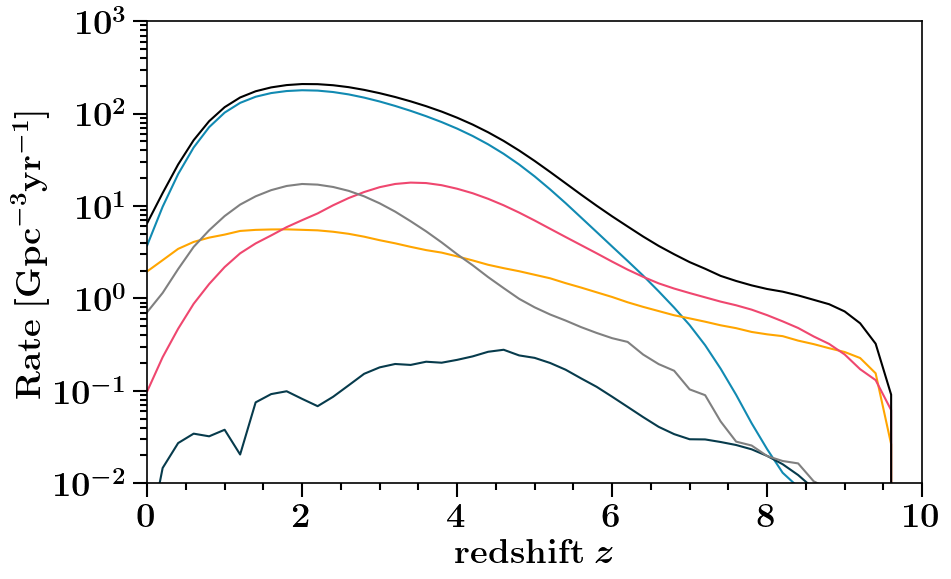

I
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha2_0/COMPASCompactOutput_BHNS_I.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


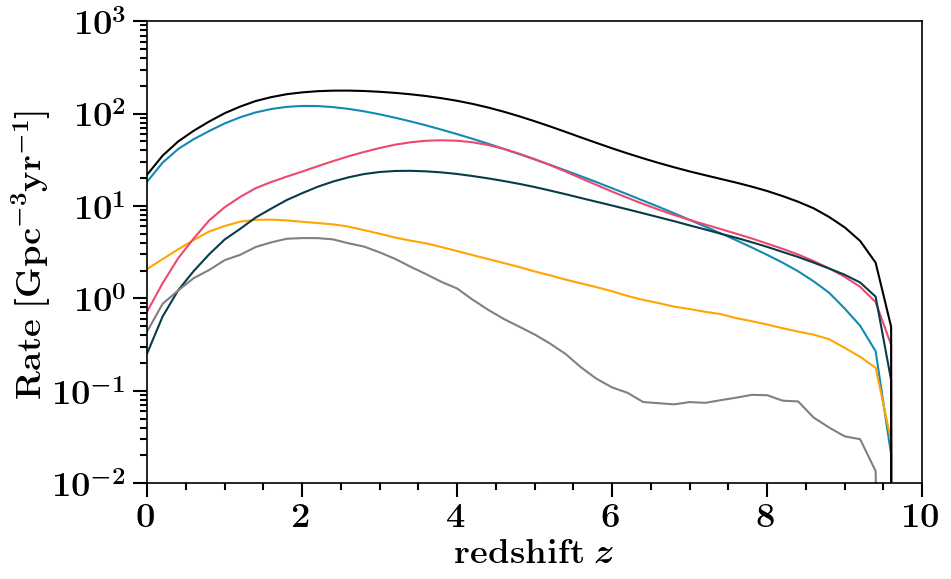

J
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha10/COMPASCompactOutput_BHNS_J.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


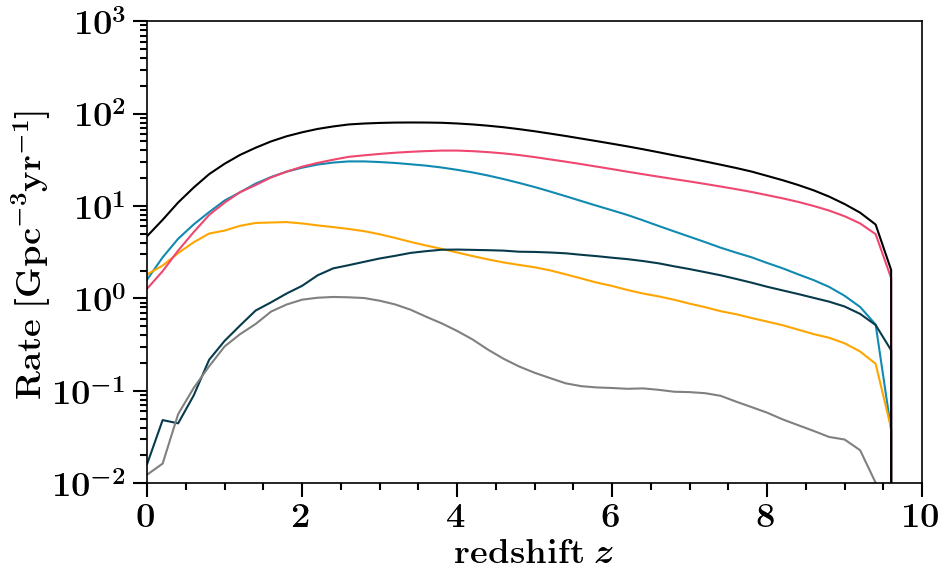

K
/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_K.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


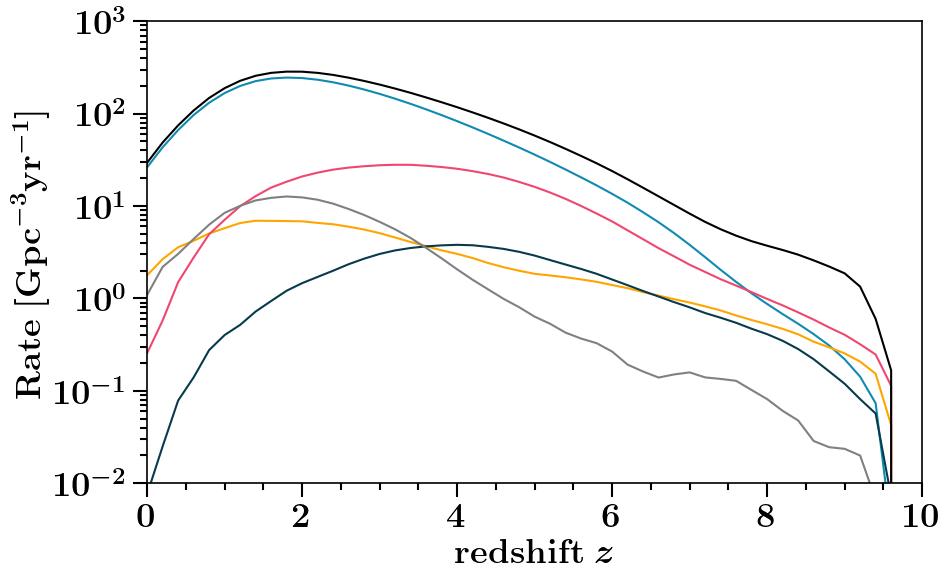

L
/Volumes/Andromeda2/DATA/AllDCO_bugfix/rapid/COMPASCompactOutput_BHNS_L.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


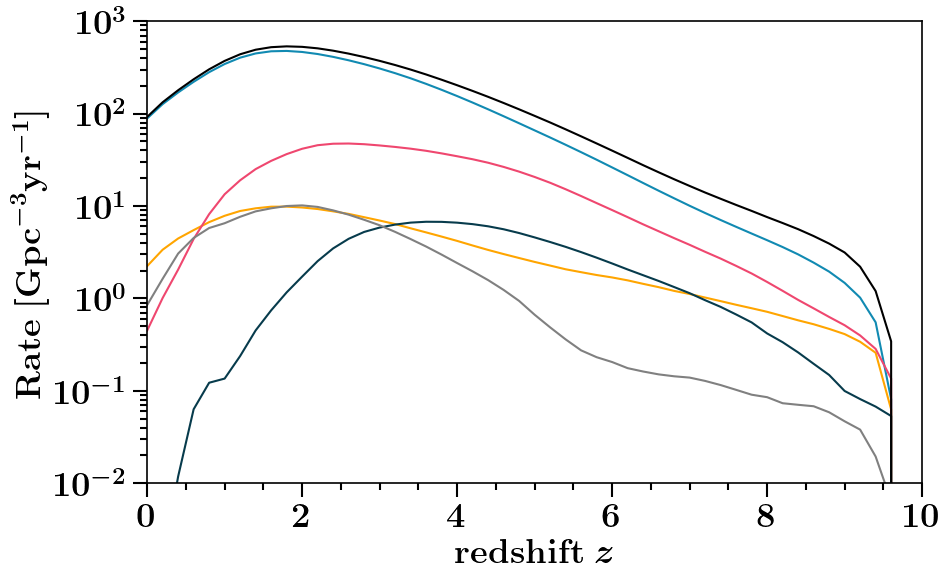

M
/Volumes/Andromeda2/DATA/AllDCO_bugfix/maxNSmass2_0/COMPASCompactOutput_BHNS_M.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


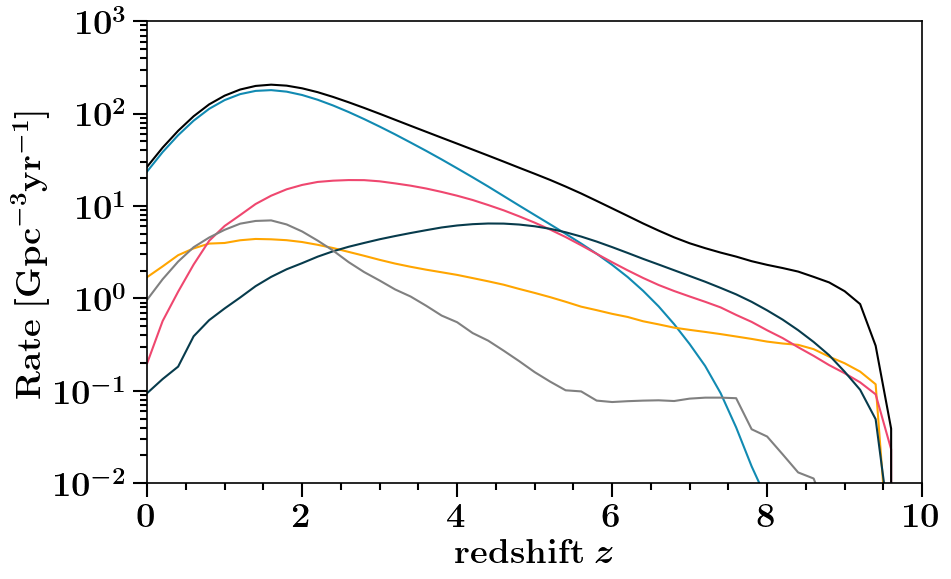

N
/Volumes/Andromeda2/DATA/AllDCO_bugfix/maxNSmass3_0/COMPASCompactOutput_BHNS_N.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


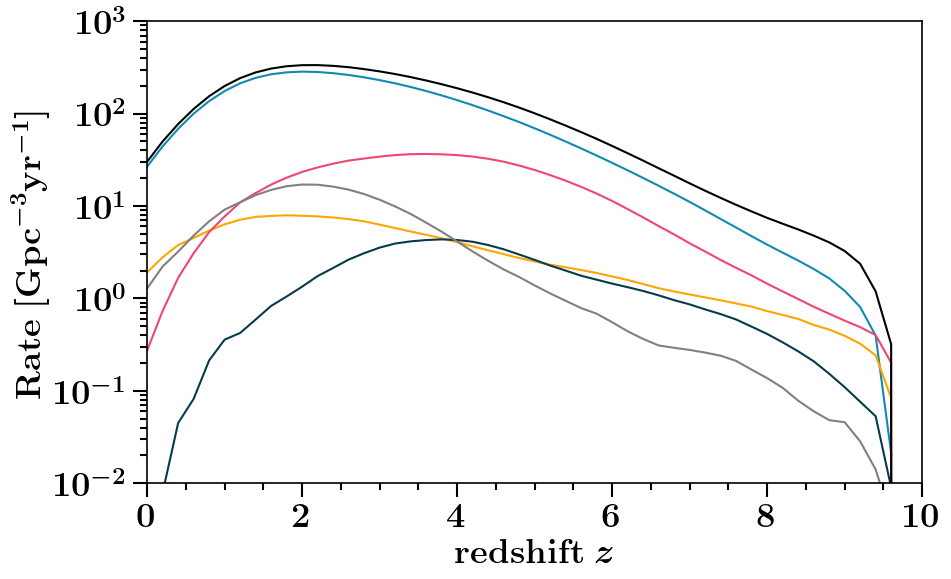

O
/Volumes/Andromeda2/DATA/AllDCO_bugfix/noPISN/COMPASCompactOutput_BHNS_O.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


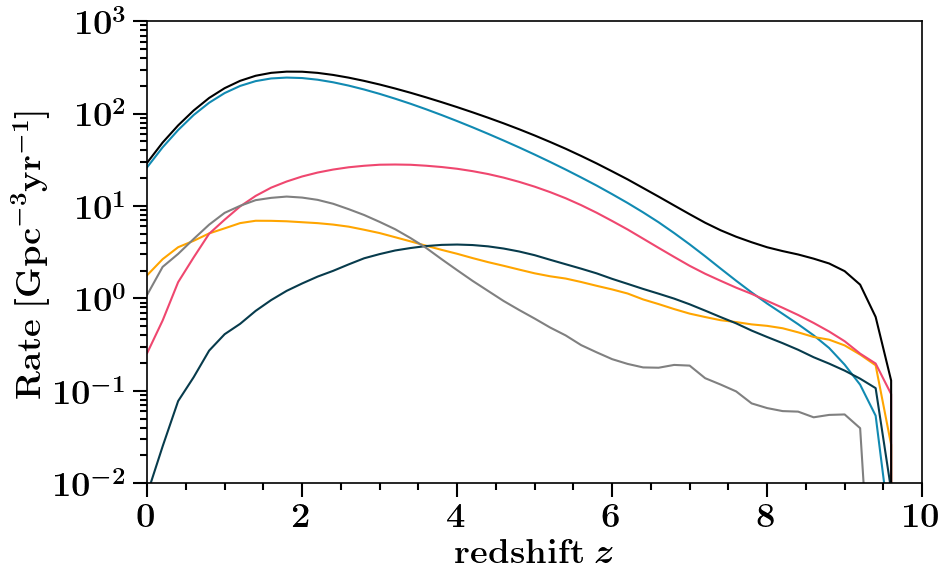

P
/Volumes/Andromeda2/DATA/AllDCO_bugfix/ccSNkick_100km_s/COMPASCompactOutput_BHNS_P.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


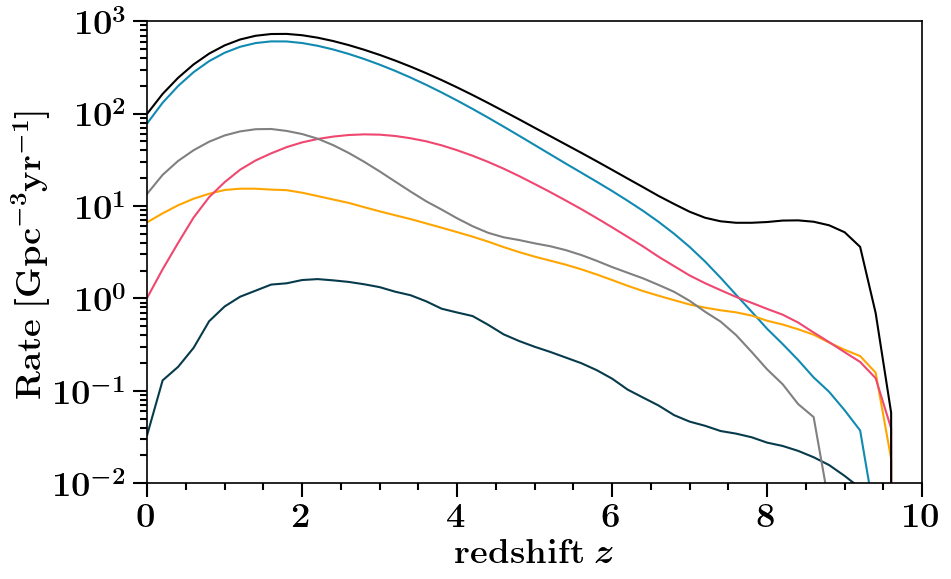

Q
/Volumes/Andromeda2/DATA/AllDCO_bugfix/ccSNkick_30km_s/COMPASCompactOutput_BHNS_Q.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


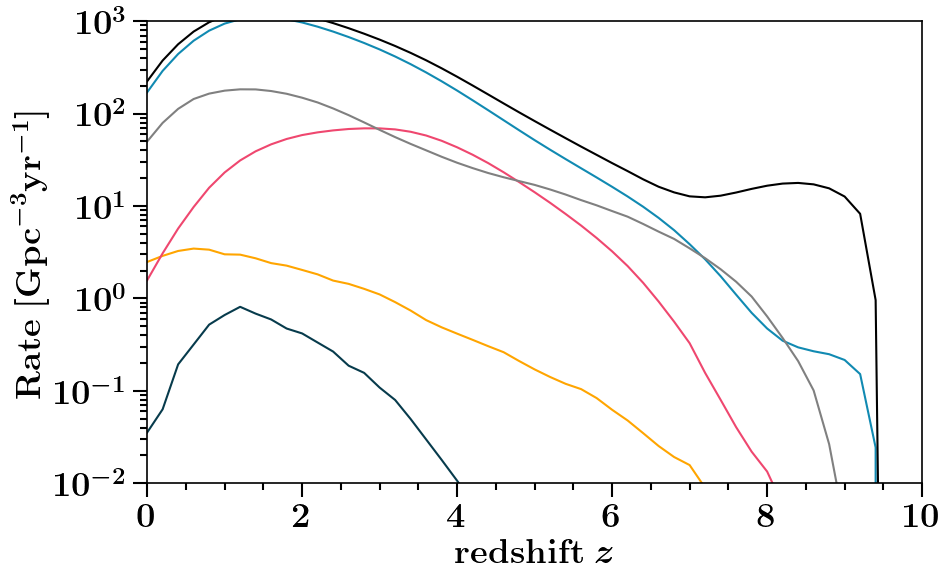

R
/Volumes/Andromeda2/DATA/AllDCO_bugfix/noBHkick/COMPASCompactOutput_BHNS_R.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


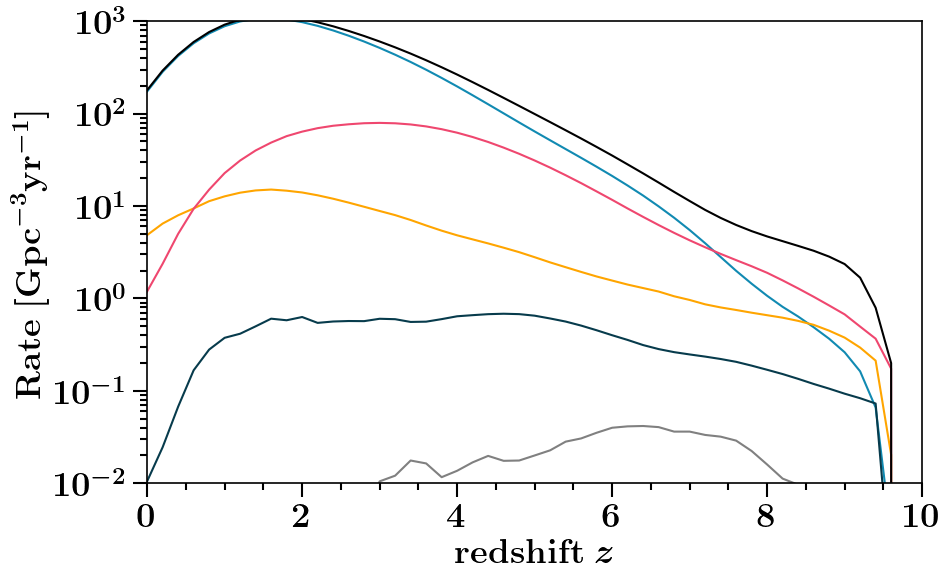

S
/Volumes/Andromeda2/DATA/AllDCO_bugfix/wolf_rayet_multiplier_0_1/COMPASCompactOutput_BHNS_S.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


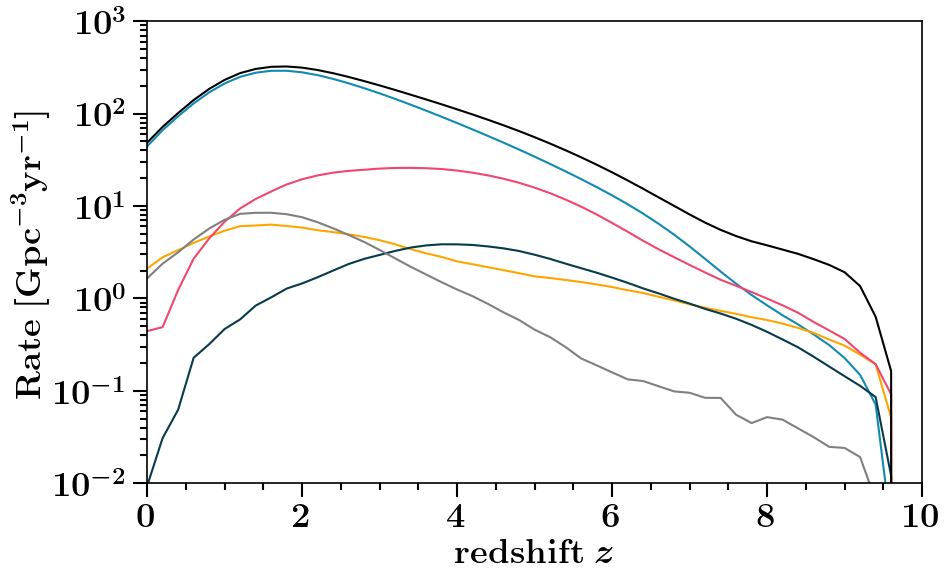

T
/Volumes/Andromeda2/DATA/AllDCO_bugfix/wolf_rayet_multiplier_5/COMPASCompactOutput_BHNS_T.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


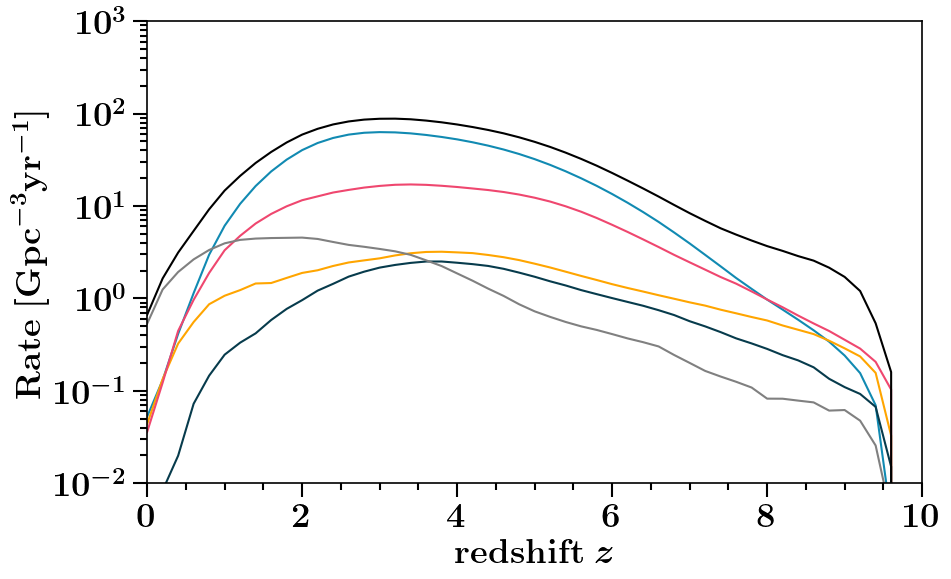


at DCOtype = BNS
A
/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BNS_A.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


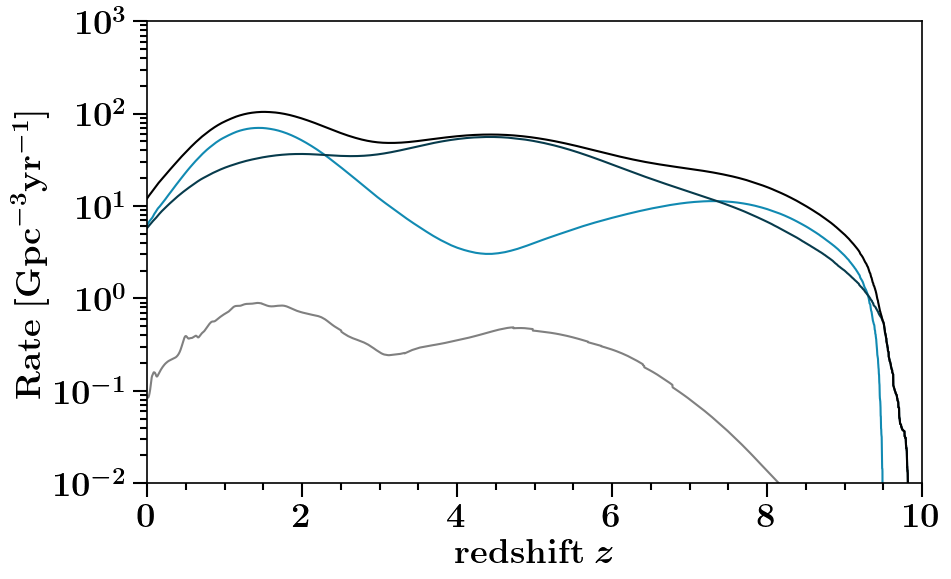

B
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_25/COMPASCompactOutput_BNS_B.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


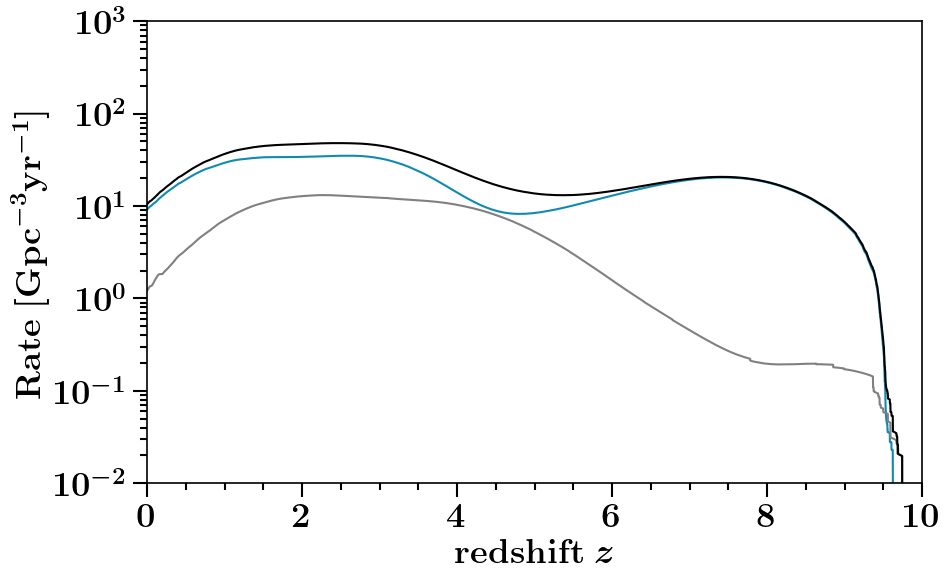

C
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_5/COMPASCompactOutput_BNS_C.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


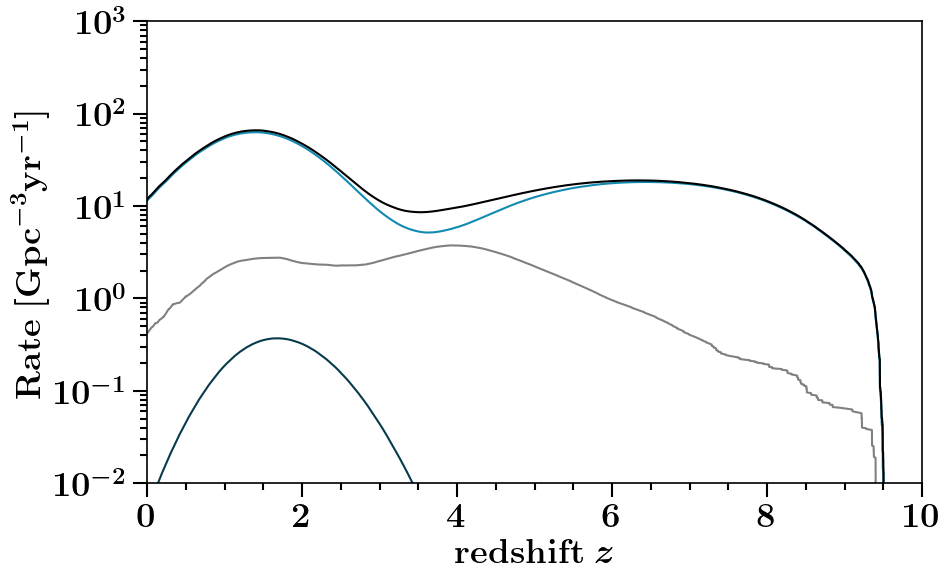

D
/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_75/COMPASCompactOutput_BNS_D.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


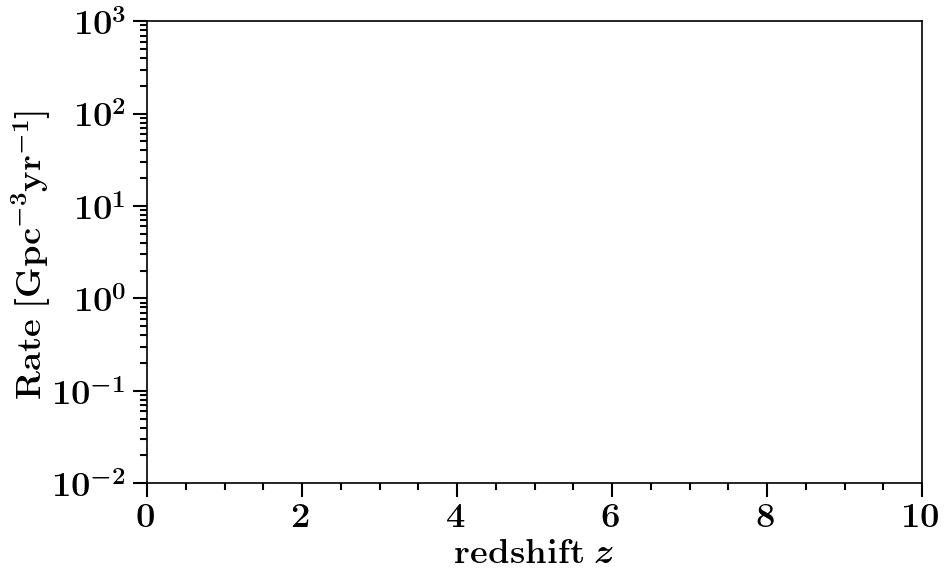

E
/Volumes/Andromeda2/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BNS_E.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


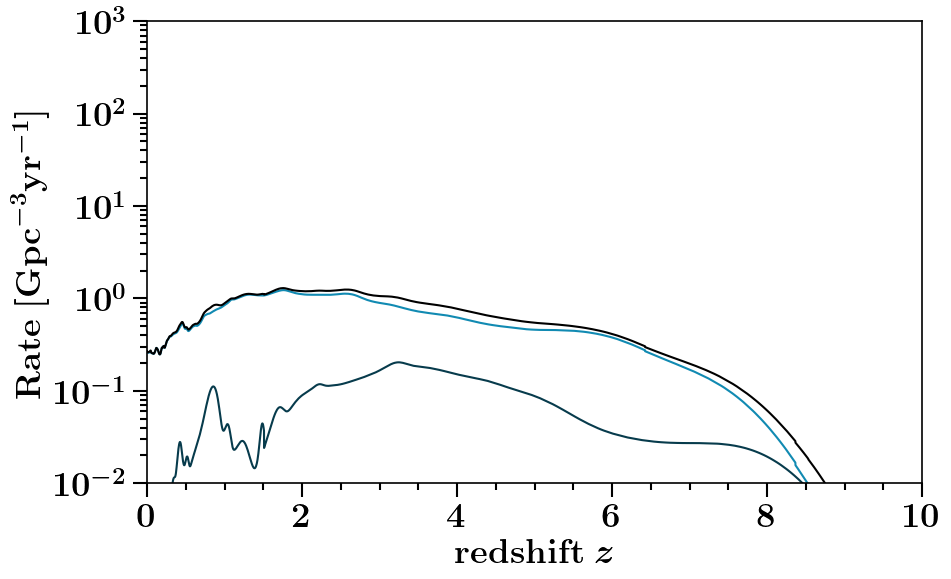

F
/Volumes/Andromeda2/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BNS_F.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


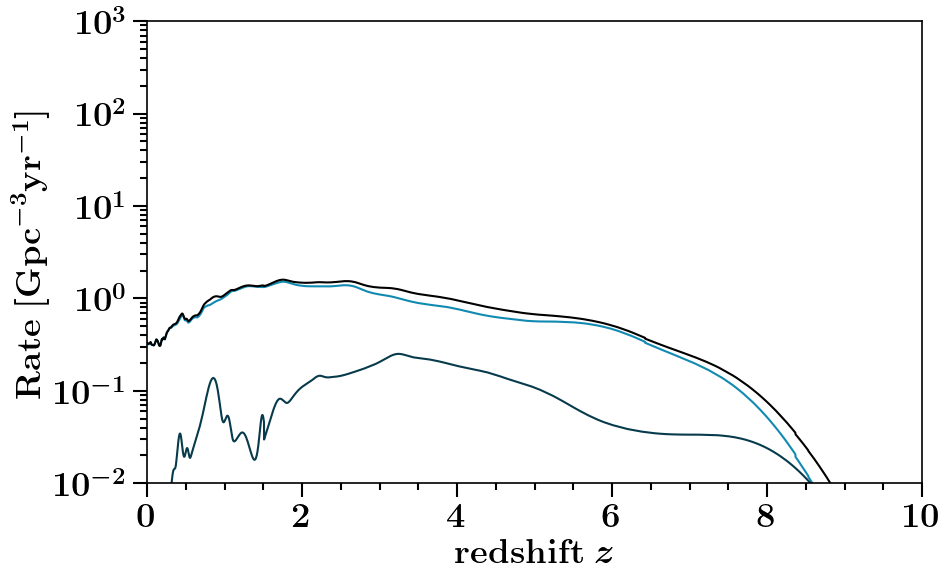

G
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha0_1/COMPASCompactOutput_BNS_G.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


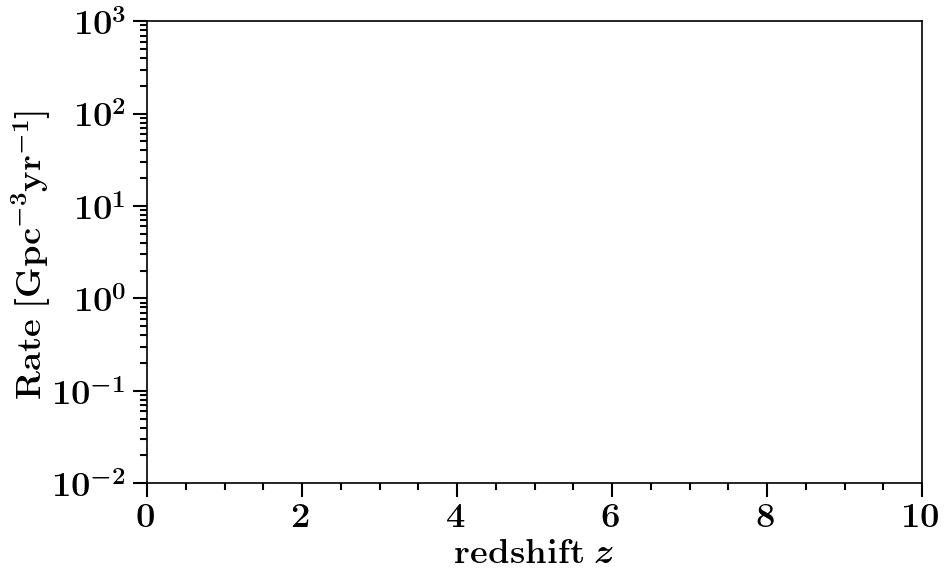

H
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha0_5/COMPASCompactOutput_BNS_H.h5
now at channel:  classic ind wanted  1
now at channel:  stable B no CEE ind wanted  2
now at channel:  immediate CE ind wanted  3
now at channel:  double-core CE ind wanted  4
now at channel:  other ind wanted  0


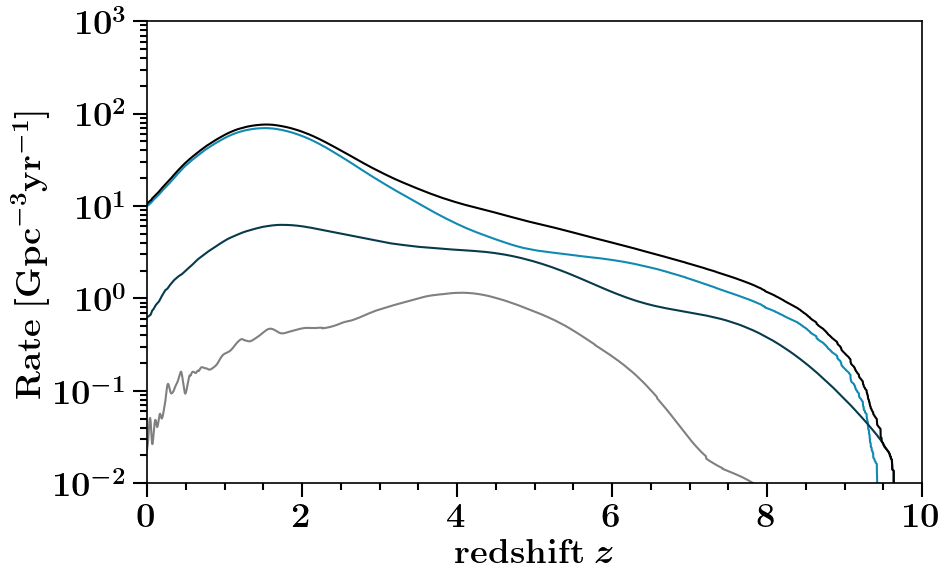

I
/Volumes/Andromeda2/DATA/AllDCO_bugfix/alpha2_0/COMPASCompactOutput_BNS_I.h5


KeyError: "Unable to open object (object 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_formationChannels' doesn't exist)"

In [7]:
for DCOtype in [ 'BHNS','BNS', 'BBH',]:
    print()
    print('at DCOtype =', DCOtype)

    for BPSmodelName in  BPSnameslist[:]:
        print(BPSmodelName)


        plot_formation_channels_redshift_rate(whichplot='rate', DCOtype=DCOtype, BPSmodelName=BPSmodelName)


In [ ]:

# ## ## redshift info ## ##
# # The group that contains the redshift rates data
# rate_key = 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0'
# redshifts                 = fdata[rate_key]['redshifts'][()] # Redshifts at which the rates were calculated
# # intrinsic redshift rates per system 
# w_per_z_per_system = fdata['Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0']['merger_rate'][...].squeeze()



In [ ]:
# BBH 

In [ ]:



def plot_formation_channels_redshift_rate(whichplot='rate', DCOtype='BHNS', fc_summary=True):
    """
    whichplot='rate', 'ratio'
    
    """

    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,6), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    # total rates 
    total_intrinsicRates = np.sum(w_per_z_per_system[~seeds_withImmediateRLOFAfterCEE], axis=0)
    
    
    
    for nrC, Channel in enumerate(adjustedChannelList): 
        print('now at channel: ', Channel)

        ind_wanted = dictFormationChannelIndex[Channel]
    #           #Get the seeds that relate to sorted indices
        mask_C  = (channels==ind_wanted)[~seeds_withImmediateRLOFAfterCEE]# everything except these seeds  

        c_FC = channelColorDict[Channel]

        intrinsicRates = np.zeros(len(redshifts))
    



        if fc_summary==True:

            channel_merger_rate = channels_merger_rate_per_z[ind_wanted]

            

        
    #     for ind_mssfr, mssfr in enumerate(MSSFRnameslist):


    #         w_int = fdata[fparam_intrinsic][weightheader][...].squeeze()[~seeds_withImmediateRLOFAfterCEE]# everything except these seeds




        intrinsicRates = np.sum(w_per_z_per_system[~seeds_withImmediateRLOFAfterCEE][mask_C], axis=0)  
        intrinsicRates2 = channels_merger_rate_per_z[ind_wanted] 
        # take ratio 
        if whichplot=='ratio':
            intrinsicRates = intrinsicRates/total_intrinsicRates
            intrinsicRates2 = channel_merger_rate/channels_merger_rate_per_z[-1]
        
        axe.plot(redshifts[:], intrinsicRates, color=c_FC)
        axe.plot(redshifts, intrinsicRates2, color=c_FC, lw=10, alpha=0.5)
        
    if whichplot=='rate':
        # plot total rates         
        axe.plot(redshifts[:], total_intrinsicRates, color='k') 
        axe.plot(redshifts, channels_merger_rate_per_z[-1], color='k', lw=10, alpha=0.5)



    
    axe.set_xlim(0,10)
    xlabel = r'\textbf{redshift} $z$'
    if whichplot=='ratio':
        ylabel = r'\textbf{fraction}'
        axe.set_ylim(0., 1)
    else:
        ylabel = r'\textbf{Rate} $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
        axe.set_ylim(0.01, 1000)
        
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=True)
    
    if whichplot!='ratio':
        axe.set_yscale('log') 
        
 
    
    plt.savefig('./FormationChannels_' + whichplot  + '_' + DCOtype + 'binned.png', dpi=100, transparent=False)#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')#, loc='upper center')    

    plt.show()
    
    
    return





In [ ]:
for DCOtype in [ 'BHNS','BNS', 'BBH',]:
    print()
    print()
    print()
    print()
    print('at DCOtype =', DCOtype)

    for BPSmodelName in  BPSnameslist[:]:
        print()
        print()
        print(BPSmodelName)

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_dir = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/'
        path_ = path_dir
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        full_data_path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        
        
        
        

In [ ]:
fileLoc    =  '/Volumes/Andromeda2/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_75/'
filename   = 'COMPASCompactOutput_BHNS_D.h5'

full_data_path = fileLoc + filename


# read in data 
fdata = h5.File(fileLoc + filename ,'r')

## ## redshift info ## ##
# The group that contains the redshift rates data  
rate_key = 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0'
redshifts                 = fdata[rate_key]['redshifts'][()] # Redshifts at which the rates were calculated

# intrinsic redshift rates per system 
w_per_z_per_system = fdata['Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0']['merger_rate'][...].squeeze()


immediateRLOFAfterCEE = fdata["commonEnvelopes"]["immediateRLOFAfterCEE"][...].squeeze()
immediateRLOFAfterCEEmask = (immediateRLOFAfterCEE==1)
CErandomSeed = fdata["commonEnvelopes"]["randomSeed"][...].squeeze()
seeds_withImmediateRLOFAfterCEE = np.in1d(fdata['doubleCompactObjects']['seed'][...].squeeze(), CErandomSeed[immediateRLOFAfterCEEmask])
print('systems with withImmediateRLOFAfterCEE',np.sum(seeds_withImmediateRLOFAfterCEE), ' which is a fraction', np.sum(seeds_withImmediateRLOFAfterCEE)/len(seeds_withImmediateRLOFAfterCEE))
seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
channels = np.asarray(identify_formation_channels(seeds=seeds, file=fdata))


rate_key = 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_formationChannels'
print(fdata[rate_key].keys())
# redshifts                  = fdata[rate_key]['redshifts'][()] # Redshifts at which the rates were calculated
channels_list                    = fdata[rate_key]['channel'][()] # Redshifts at which the rates were calculated
channels_merger_rate_per_z = fdata[rate_key]['channels_merger_rate_per_z'][()]

plot_formation_channels_redshift_rate(whichplot='rate' , DCOtype='BHNS', fc_summary=True)
plot_formation_channels_redshift_rate(whichplot='ratio', DCOtype='BHNS', fc_summary=True)

fdata.close()


In [ ]:
fs_l = 28 # label fontsize

#     colors = ['#1f77b4', '#ff7f0e']
#     colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]


BPSmodelName='A'

DCOtype='BBH'
# path for files 
path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

fdata = h5.File(path, 'r')
massCO_ZAMSM1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
massCO_ZAMSM2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
# M1 will be the most massive, M2 the least massive compact object. 
massCO_LVKM1, massCO_LVKM2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
MassRatioCO_LVK = massCO_LVKM2/massCO_LVKM1

seedsDCO  = fdata['doubleCompactObjects']['seed'][...].squeeze()  # get the seeds in the DCO file 
seedsSN   = fdata['supernovae']['randomSeed'][...].squeeze()    # get the seeds in the SN file 
indices   = np.sort(np.unique(seedsSN[1::2], return_index=True)[1])
maskSNdco = np.in1d(seedsSN,  seedsDCO) # mask in the SNe files the SNe that correspond to our DCO
whichSN   = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]  # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova     
whichSN2  = whichSN[1::2][indices]

# either SN2 = primary (1) and M1 is > M2, or SN2 = secondary & M1 < M2 
# this takes into account (first term) rejuvenation 
mask_MRR = ((whichSN2==1) & (massCO_ZAMSM1>massCO_ZAMSM2) ) | ((whichSN2==2) & (massCO_ZAMSM1<massCO_ZAMSM2)) 


# obtain formation channels 
seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
channels = identify_formation_channels(seeds=seeds, file=fdata)

In [ ]:
merger_rate = fdata['Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_zBinned']['merger_rate'][...].squeeze()
redshift = fdata['Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_zBinned']['redshifts'][...].squeeze()

SEED_z = fdata['Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_zBinned']['SEED'][...].squeeze()

In [ ]:

x_redshifts = (redshift[0:-1] +redshift[1:]) /2
y_rates = np.zeros_like(x_redshifts)



#     channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other']
adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other']
#     adjustedChannelList = ['classic']#, 'stable B no CEE', 'immediate CE']#
for nrC, Channel in enumerate(adjustedChannelList): 

    print('now at channel: ', Channel)
    ind_wanted = dictFormationChannelIndex[Channel]

    c_FC = channelColorDict[Channel]
    colors_lighter_FC =  channelColorDict_lighter[Channel]
    mask_MRR = (channels==ind_wanted)
    
    seed_FC = seedsDCO[mask_MRR]
    mask_seed_z = np.in1d(SEED_z,seed_FC)
    
    
    print(len(mask_MRR))
    print(len(merger_rate[:,ind_z]))
    for ind_z, z in enumerate(x_redshifts):
#         print(len(merger_rate[:,ind_z]))
#         print()
        
        y_rates[ind_z] = np.sum(merger_rate[:,ind_z][mask_seed_z])
    
        a=1


    plt.plot(x_redshifts,y_rates, color=c_FC)

    
    
plt.xlabel('redshift z', fontsize=12)
plt.ylabel(r'Rate Intrinsic $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$')
    
    
    
plt.savefig('./rateBBH_%s_BHNSlog.pdf'%BPSmodelName, transparent=False, bbox_inches="tight",  format='pdf')
plt.savefig('./rateBBH_%s_BHNSlog.png'%BPSmodelName, transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.yscale('log')


plt.show()





for nrC, Channel in enumerate(adjustedChannelList): 

    print('now at channel: ', Channel)
    ind_wanted = dictFormationChannelIndex[Channel]

    c_FC = channelColorDict[Channel]
    colors_lighter_FC =  channelColorDict_lighter[Channel]
    mask_MRR = (channels==ind_wanted)
    
    seed_FC = seedsDCO[mask_MRR]
    mask_seed_z = np.in1d(SEED_z,seed_FC)
    
    
    print(len(mask_MRR))
    print(len(merger_rate[:,ind_z]))
    for ind_z, z in enumerate(x_redshifts):
#         print(len(merger_rate[:,ind_z]))
#         print()
        
        y_rates[ind_z] = np.sum(merger_rate[:,ind_z][mask_seed_z])
    
        a=1


    plt.plot(x_redshifts,y_rates, color=c_FC)

    
    
plt.xlabel('redshift z', fontsize=12)
plt.ylabel(r'Rate Intrinsic $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$')
    
    
    
plt.savefig('./rateBBH_%s_BHNS.pdf'%BPSmodelName, transparent=False, bbox_inches="tight",  format='pdf')
plt.savefig('./rateBBH_%s_BHNS.png'%BPSmodelName, transparent=False, bbox_inches="tight", dpi=600, format='png')
# plt.yscale('log')


plt.show()




In [ ]:
1521875 - 1525553

In [ ]:
print(fdata.keys())
print(fdata['Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0'].keys())
print(fdata['Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_zBinned'].keys())

In [ ]:
print(np.shape(fdata['Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_zBinned']['merger_rate']))

In [ ]:
print(np.shape(merger_rate), merger_rate)
print(np.shape(redshift), redshift)




In [ ]:
print(print(np.sum(merger_rate[:,0])))

In [ ]:




def plot_FC_distribution(axe='None', xparam='chiEff', BPSmodelName='A', mode='pdf',\
                          spin_threshold='None', bw=0.01, xlim=[0,1], ylim=[0,1],\
                          plotYlog='False', ylim_threshold=0.02):#, mssfr='112'):
    
    fs_l = 28 # label fontsize
    
#     colors = ['#1f77b4', '#ff7f0e']
#     colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]

    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    
    fdata = h5.File(path, 'r')
    massCO_ZAMSM1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
    massCO_ZAMSM2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    massCO_LVKM1, massCO_LVKM2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    MassRatioCO_LVK = massCO_LVKM2/massCO_LVKM1
    
    seedsDCO  = fdata['doubleCompactObjects']['seed'][...].squeeze()  # get the seeds in the DCO file 
    seedsSN   = fdata['supernovae']['randomSeed'][...].squeeze()    # get the seeds in the SN file 
    indices   = np.sort(np.unique(seedsSN[1::2], return_index=True)[1])
    maskSNdco = np.in1d(seedsSN,  seedsDCO) # mask in the SNe files the SNe that correspond to our DCO
    whichSN   = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]  # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova     
    whichSN2  = whichSN[1::2][indices]

    # either SN2 = primary (1) and M1 is > M2, or SN2 = secondary & M1 < M2 
    # this takes into account (first term) rejuvenation 
    mask_MRR = ((whichSN2==1) & (massCO_ZAMSM1>massCO_ZAMSM2) ) | ((whichSN2==2) & (massCO_ZAMSM1<massCO_ZAMSM2)) 

    
    
    # obtain formation channels 
    seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
    channels = identify_formation_channels(seeds=seeds, file=fdata)
    
    
    
    del massCO_ZAMSM1
    del massCO_ZAMSM2
    del whichSN2
    del whichSN
    del maskSNdco
    del indices
    del seedsSN
    del seedsDCO


    
    if (mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction', 'm1spin_or_m2spin_fraction', 'spin_CDF' ]) | (xparam in ['chi_of_spinning_BH', 'chi_effective', 'log10_t_delay']):
        spin = COspin(data_path=path, state='he_depletion')  # set class 
        spin.setCOMPASData() # reads in the COMPAS DCO parameters 
        spinZAMSM1, spinZAMSM2  = spin.BaveraSpin() #ZAMS M1 SPIN 

        spinLVKM1, spinLVKM2 = np.zeros_like(spinZAMSM1), np.zeros_like(spinZAMSM1)
        spinLVKM1[mask_MRR] = spinZAMSM2[mask_MRR]  # MRR so M1 comes from M2ZAMS, we assign it spin from M2ZAMS
        spinLVKM1[~mask_MRR] = spinZAMSM1[~mask_MRR]  # no MRR so M1 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[mask_MRR] = spinZAMSM1[mask_MRR]   # MRR so M2 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[~mask_MRR] = spinZAMSM2[~mask_MRR]   # no MRR so M2 comes from M2ZAMS, we assign it spin from M2ZAMS     

        # spin_threshold = 0.05 # definition of "spinning BH"
        mask_LVKM1_spinning = (spinLVKM1 > spin_threshold ) 
        mask_LVKM2_spinning = (spinLVKM2 > spin_threshold ) # definition of "spinning BH"
        mask_anySpin = (spinLVKM1 > spin_threshold ) | (spinLVKM2 > spin_threshold )    

    

    if xparam=='chirp_mass_LVK':
        param_x = chirpmass(massCO_LVKM1, massCO_LVKM2)
        nameX = r'$\mathcal{M}_{\rm{c}} \ [M_{\odot}]$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(1,30,1000)
        print(param_x)
        print(np.shape(param_x))
        
    elif xparam=='mass_ratio_LVK':
        param_x = MassRatioCO_LVK
        nameX = r'$q$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,1.2,1000)

        

    elif xparam=='mass_1_LVK':
        param_x = massCO_LVKM1
        nameX = r'$m_1 [M_{\odot}]$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-1,50,1000)
        print(param_x)
        print(np.shape(param_x))
        
    elif xparam=='chi_of_spinning_BH':
        param_x = spinLVKM1 + spinLVKM2

        nameX = r'$\chi_{\rm{i}}$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,2,1000)  

        
    elif xparam=='chi_effective':
        param_x = ((spinLVKM1*massCO_LVKM1) + (spinLVKM2*massCO_LVKM2)) / (massCO_LVKM1+massCO_LVKM2)
        nameX = r'$\chi_{\rm{eff}}$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,2,1000)          
        
    elif xparam=='log10_t_delay':
        param_x = (fdata['doubleCompactObjects']['tform'][...].squeeze() +  fdata['doubleCompactObjects']['tc'][...].squeeze() ) / 1000 # divide by 1000 to make it in [Gyr]
        param_x = np.log10(param_x)
        nameX = r'$t_{\rm{delay}} \ [\rm{Gyr}]$'
        nameY = r'\textbf{PDF}'  
        xx = np.linspace(-4,2,1000)  

    
    if (mode=='MRR_PDF') | (mode=='spin_PDF'):
        nameY = r'\textbf{PDF}'
    elif (mode=='MRR_fraction'):
        nameY = r'$\rm{f}_{\rm{channel}}$'
    elif (mode=='notMRR_fraction'):
        nameY = r'$\rm{f}_{\rm{non MRR}}$'
    elif (mode=='spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='m1spin_or_m2spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{\rm{i}} > %s}$'%spin_threshold 
    elif (mode=='MRR_CDF') | (mode=='spin_CDF'):
        nameY = r'\textbf{CDF}'
    elif (mode=='spinOne_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='spinTwo_fraction'):
        nameY =   r'$\rm{f}_{\chi_{2} > %s}$'%spin_threshold
    else:
        raise ValueError("the provided `mode` is not recognized, the value given is %s"%mode)
        
    
    estimator = FFTKDE(kernel='biweight', bw=bw)
    
    if plotYlog==True:       
        axe.set_yscale('log')
        
        
        
#     channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other']
    adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other']
#     adjustedChannelList = ['classic']#, 'stable B no CEE', 'immediate CE']#
    for nrC, Channel in enumerate(adjustedChannelList): 
        
        print('now at channel: ', Channel)
        ind_wanted = dictFormationChannelIndex[Channel]
        
        
        
        c_FC = channelColorDict[Channel]
        colors_lighter_FC =  channelColorDict_lighter[Channel]
#         print('now at channel', Channel)




        mask_MRR = (channels==ind_wanted)
    
        if len(mask_MRR)>0:
    
            for ind_mssfr, mssfr in enumerate(MSSFRnameslist[0:]):
#             for ind_mssfr, mssfr in enumerate(MSSFRnameslist[0:2]):    

                ls_ = '-'
                Highlight = False
                if ((mssfr in ['123']) & (BPSmodelName in ['K'])):
                    ls_ = ':'
                    Highlight = True
                elif  ((mssfr in ['312']) & (BPSmodelName in ['T'])):
                    ls_ = '--'
                    Highlight = True
                elif ((mssfr in ['231']) & (BPSmodelName in ['O'])):
                    ls_ = '-.'
                    Highlight = True




                ### read in MSSFR weights: ###
    #             fparam_key = 'weights_detected'
                fparam_key = 'weights_intrinsic'
                weightheader = 'w_' + mssfr
                weights_ = fdata[fparam_key][weightheader][...].squeeze()
                w = weights_
             

                if (mode=='MRR_PDF') | (mode=='MRR_fraction') |  (mode=='notMRR_fraction') : 
                    # we want at least 10 datapoint for KDE
                    if len(w[mask_MRR])>10:
                
                        yy_MRR = estimator.fit(param_x[mask_MRR], weights=w[mask_MRR]).evaluate(xx) 
                        yy_total = estimator.fit(param_x, weights=w).evaluate(xx) 
                        rel_weight_MRR    = np.sum(w[mask_MRR])  / (np.sum(w))
                        yy_MRR *= rel_weight_MRR
                    else:
                        print('%s data points for KDE, this is below the threshold 10, not drawing KDE'%len(w[mask_MRR]))



                ### PLOTTING ###
                ## IF WE ARE PLOTTING PDFs
                if (mode=='MRR_PDF') | (mode=='spin_PDF'):
                    if Highlight==True:
                        axe.plot(xx, yy_MRR,    color=c_FC, lw=3, zorder=16, alpha=1, ls=ls_)
                    else:
                        axe.plot(xx, yy_MRR,    color=colors_lighter_FC, lw=3, zorder=6, alpha=1, ls=ls_)

                    axe = layoutAxes(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=0, fontsize=fs_l, labelSizeMajor=fs_major)  



    if mode in [ 'MRR_fraction', 'notMRR_fraction', 'spinTwo_fraction', 'spinOne_fraction', 'm1spin_or_m2spin_fraction']:
        axe.set_yticks([ 0.5, 1])
    elif mode in ['MRR_CDF', 'spin_CDF']:
        axe.set_yticks([0.5, 0.75, 1])
        

            
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    axe.grid(True)
    
    


    
    return axe 









## Loop over BPS models:

In [ ]:
## writing here 






for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:3]):

    fig, ax = plt.subplots(1,1, figsize=(14,9))#,\

    fs_major=34
    
    print('running model %s'%BPSmodel)
    
    s_text = r'model %s: '%BPSmodel + alphabetPhysicalNameDictWithEnter[BPSmodel]
    ax.text(0.98, 0.97, s=s_text , rotation = 0, fontsize=24, color = 'k', va='top', ha = 'right',transform=ax.transAxes)#, weight = 'bold')

    # CHIRP MASS 
    print('at mass_1_LVK')
#     print('at chirp mass')
    bw=0.40
    ylim_threshold = 0.0004       
    xparam = 'mass_1_LVK'
#     xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 25], [0.0003, .25]

    plotYlog = True
#     ylim = [0.0003, 1.25]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)


#     xx = np.linspace(1000,20000,100)
#     yy = np.linspace(1000,20000,100)
#     lw=12
#     fs = 30

    # ax.plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
    # ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
    # ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')


    plt.tight_layout()  
    # plt.subplots_adjust(wspace=0.2, hspace=0.1)



#     plt.savefig('./singlemodel/super_FC_split_panel_%s_BHNS.pdf'%BPSmodel, transparent=False, bbox_inches="tight",  format='pdf')
#     plt.savefig('./singlemodel/super_FC_split_panel_%s_BHNS.png'%BPSmodel, transparent=False, bbox_inches="tight", dpi=600, format='png')
    plt.show()  











## all together

In [ ]:
## writing here 



fig, ax = plt.subplots(1,1, figsize=(14,9))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:2]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    print('at mass_1_LVK')
#     print('at chirp mass')
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'mass_1_LVK'
#     xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 48], [0.0, 2.03]

    plotYlog = True
    ylim = [0.0003, 0.15]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



# plt.savefig('./super_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./super_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:
## writing here 



fig, ax = plt.subplots(1,1, figsize=(14,9))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    print('at mass_1_LVK')
#     print('at chirp mass')
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'mass_1_LVK'
#     xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 48], [0.0, 2.03]

    plotYlog = True
    ylim = [0.0003, 0.15]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



plt.savefig('./m1LVK_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
plt.savefig('./m1LVK_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:
[21.13608489 10.0464932  12.86334076 ...  3.81552635  3.65272609
  3.86739222]
(8371398,)

running model A
at mass_1_LVK
[33.4712  17.0417  14.9915  ...  5.15439  5.54399  5.15051]
(8371398,)
now at channel:  classic

In [ ]:
running model A
at chirp mass
[21.13608489 10.0464932  12.86334076 ...  3.81552635  3.65272609
  3.86739222]
(8371398,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE
running model B
at chirp mass
[21.59870452  9.69384928  9.8673975  ...  3.16114459  3.28597739
  2.81796725]
(8616008,)
now at channel:  classic
now at channel:  stable B no CEE
now at channel:  immediate CE

In [ ]:
## new 



fig, ax = plt.subplots(1,1, figsize=(14,9))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    print('at chirp mass')
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 38], [0.0, 1.03]

    plotYlog = True
    ylim = [0.0003, 0.15]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



# plt.savefig('./super_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./super_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:




fig, ax = plt.subplots(1,1, figsize=(14,10))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:2]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
        ## MASS 1##
    print('at mass 1 LVK')
    xparam = 'mass_1_LVK'
    ylim_threshold = 0.0004
    bw = 0.85
    plotYlog = False
    xlim, ylim = [0, 40], [0.0, 1.03]
#     ax[0,1] = plot_FC_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
#     ax[1,1] = plot_FC_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.0003, 0.15]

    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



# plt.savefig('./super_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./super_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:




fig, ax = plt.subplots(1,1, figsize=(14,10))#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[0:2]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    print('at chirp mass')
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 38], [0.0, 1.03]

    plotYlog = True
    ylim = [0.0003, 0.15]
    ax = plot_FC_distribution(axe=ax, xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)






xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
# plt.subplots_adjust(wspace=0.2, hspace=0.1)



# plt.savefig('./super_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./super_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:




fig, ax = plt.subplots(3,3, figsize=(30,8), gridspec_kw={"height_ratios":[1, 1, 2.5], "width_ratios":[1, 1, 1]})#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[:2]):

    
    print('running model %s'%BPSmodel)

        ## MASS 1##
    print('at mass 1 LVK')
    xparam = 'chirp_mass_LVK' #'mass_1_LVK'
    ylim_threshold = 0.0004
    bw = 0.85
    plotYlog = False
    xlim, ylim = [0, 45], [0.0, 1.03]
#     ax[0,1] = plot_FC_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
#     ax[1,1] = plot_FC_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.0003, 0.15]
    ax[2,0] = plot_FC_distribution(axe=ax[2,0], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)

        

xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30


plt.tight_layout()  
plt.subplots_adjust(wspace=0.2, hspace=0.1)

# plt.savefig('./single_FC_split_panel.pdf', transparent=False, bbox_inches="tight",  format='pdf')
# plt.savefig('./single_FC_split_panel.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











# OLD CODE 

In [ ]:


channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}

channelColorDict_lighter = {1:adjust_lightness(color='#118AB2', amount=1.6), 2:adjust_lightness(color='#EF476F', amount=1.4), 3:adjust_lightness(color='#FFD166', amount=1.2), 4:adjust_lightness(color='#073B4C', amount=1.8), 0:adjust_lightness(color='gray', amount=1.5)}


def plot_FC_distribution(axe='None', xparam='chiEff', BPSmodelName='A', mode='pdf',\
                          spin_threshold='None', bw=0.01, xlim=[0,1], ylim=[0,1],\
                          plotYlog='False', ylim_threshold=0.02):#, mssfr='112'):
    
    fs_l = 28 # label fontsize
    
    colors = ['#1f77b4', '#ff7f0e']
    colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]

    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    
    fdata = h5.File(path, 'r')
    massCO_ZAMSM1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
    massCO_ZAMSM2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    massCO_LVKM1, massCO_LVKM2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    MassRatioCO_LVK = massCO_LVKM2/massCO_LVKM1
    
    seedsDCO  = fdata['doubleCompactObjects']['seed'][...].squeeze()  # get the seeds in the DCO file 
    seedsSN   = fdata['supernovae']['randomSeed'][...].squeeze()    # get the seeds in the SN file 
    indices   = np.sort(np.unique(seedsSN[1::2], return_index=True)[1])
    maskSNdco = np.in1d(seedsSN,  seedsDCO) # mask in the SNe files the SNe that correspond to our DCO
    whichSN   = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]  # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova     
    whichSN2  = whichSN[1::2][indices]

    # either SN2 = primary (1) and M1 is > M2, or SN2 = secondary & M1 < M2 
    # this takes into account (first term) rejuvenation 
    mask_MRR = ((whichSN2==1) & (massCO_ZAMSM1>massCO_ZAMSM2) ) | ((whichSN2==2) & (massCO_ZAMSM1<massCO_ZAMSM2)) 

    
    
    # obtain formation channels 
    seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
    channels = identify_formation_channels(seeds=seeds, file=fdata)
    
    
    
    del massCO_ZAMSM1
    del massCO_ZAMSM2
    del whichSN2
    del whichSN
    del maskSNdco
    del indices
    del seedsSN
    del seedsDCO


    
    if (mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction', 'm1spin_or_m2spin_fraction', 'spin_CDF' ]) | (xparam in ['chi_of_spinning_BH', 'chi_effective', 'log10_t_delay']):
        spin = COspin(data_path=path, state='he_depletion')  # set class 
        spin.setCOMPASData() # reads in the COMPAS DCO parameters 
        spinZAMSM1, spinZAMSM2  = spin.BaveraSpin() #ZAMS M1 SPIN 

        spinLVKM1, spinLVKM2 = np.zeros_like(spinZAMSM1), np.zeros_like(spinZAMSM1)
        spinLVKM1[mask_MRR] = spinZAMSM2[mask_MRR]  # MRR so M1 comes from M2ZAMS, we assign it spin from M2ZAMS
        spinLVKM1[~mask_MRR] = spinZAMSM1[~mask_MRR]  # no MRR so M1 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[mask_MRR] = spinZAMSM1[mask_MRR]   # MRR so M2 comes from M1ZAMS, we assign it spin from M1ZAMS
        spinLVKM2[~mask_MRR] = spinZAMSM2[~mask_MRR]   # no MRR so M2 comes from M2ZAMS, we assign it spin from M2ZAMS     

        # spin_threshold = 0.05 # definition of "spinning BH"
        mask_LVKM1_spinning = (spinLVKM1 > spin_threshold ) 
        mask_LVKM2_spinning = (spinLVKM2 > spin_threshold ) # definition of "spinning BH"
        mask_anySpin = (spinLVKM1 > spin_threshold ) | (spinLVKM2 > spin_threshold )    

    

    if xparam=='chirp_mass_LVK':
        param_x = chirpmass(massCO_LVKM1, massCO_LVKM2)
        nameX = r'$\mathcal{M}_{\rm{c}} \ [M_{\odot}]$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(1,100,1000)

    elif xparam=='mass_ratio_LVK':
        param_x = MassRatioCO_LVK
        nameX = r'$q$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,1.2,1000)
        
    elif xparam=='chi_of_spinning_BH':
        param_x = spinLVKM1 + spinLVKM2

        nameX = r'$\chi_{\rm{i}}$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,2,1000)  

        
    elif xparam=='chi_effective':
        param_x = ((spinLVKM1*massCO_LVKM1) + (spinLVKM2*massCO_LVKM2)) / (massCO_LVKM1+massCO_LVKM2)
        nameX = r'$\chi_{\rm{eff}}$'
        nameY = r'\textbf{PDF}'
        xx = np.linspace(-0.2,2,1000)          
        
    elif xparam=='log10_t_delay':
        param_x = (fdata['doubleCompactObjects']['tform'][...].squeeze() +  fdata['doubleCompactObjects']['tc'][...].squeeze() ) / 1000 # divide by 1000 to make it in [Gyr]
        param_x = np.log10(param_x)
        nameX = r'$t_{\rm{delay}} \ [\rm{Gyr}]$'
        nameY = r'\textbf{PDF}'  
        xx = np.linspace(-4,2,1000)  

    
    if (mode=='MRR_PDF') | (mode=='spin_PDF'):
        nameY = r'\textbf{PDF}'
    elif (mode=='MRR_fraction'):
        nameY = r'$\rm{f}_{\rm{channel}}$'
    elif (mode=='notMRR_fraction'):
        nameY = r'$\rm{f}_{\rm{non MRR}}$'
    elif (mode=='spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='m1spin_or_m2spin_fraction'):
        nameY =   r'$\rm{f}_{\chi_{\rm{i}} > %s}$'%spin_threshold 
    elif (mode=='MRR_CDF') | (mode=='spin_CDF'):
        nameY = r'\textbf{CDF}'
    elif (mode=='spinOne_fraction'):
        nameY =   r'$\rm{f}_{\chi_{1} > %s}$'%spin_threshold
    elif (mode=='spinTwo_fraction'):
        nameY =   r'$\rm{f}_{\chi_{2} > %s}$'%spin_threshold
    else:
        raise ValueError("the provided `mode` is not recognized, the value given is %s"%mode)
        
    
    estimator = FFTKDE(kernel='biweight', bw=bw)
    
    if plotYlog==True:       
        axe.set_yscale('log')
        
        
        

    for nrC, Channel in enumerate(list(np.unique(channels))): 
        
        
        mask_MRR = (channels==Channel)
        c_FC = channelColorDict[Channel]
        colors_lighter_FC =  channelColorDict_lighter[Channel]
#         print('now at channel', Channel)
    
#         for ind_mssfr, mssfr in enumerate(MSSFRnameslist[0:]):
        for ind_mssfr, mssfr in enumerate(MSSFRnameslist[0:]):    

            ls_ = '-'
            Highlight = False
            if ((mssfr in ['123']) & (BPSmodelName in ['K'])):
                ls_ = ':'
                Highlight = True
            elif  ((mssfr in ['312']) & (BPSmodelName in ['T'])):
                ls_ = '--'
                Highlight = True
            elif ((mssfr in ['231']) & (BPSmodelName in ['O'])):
                ls_ = '-.'
                Highlight = True




            ### read in MSSFR weights: ###
            fparam_key = 'weights_detected'
            weightheader = 'w_' + mssfr
            weights_ = fdata[fparam_key][weightheader][...].squeeze()
            w = weights_

            if (mode=='MRR_PDF') | (mode=='MRR_fraction') |  (mode=='notMRR_fraction') : 
#                 yy_nonMRR = estimator.fit(param_x[~mask_MRR], weights=w[~mask_MRR]).evaluate(xx)
                yy_MRR = estimator.fit(param_x[mask_MRR], weights=w[mask_MRR]).evaluate(xx) 
                yy_total = estimator.fit(param_x, weights=w).evaluate(xx) 
        
#                 rel_weight_nonMRR = np.sum(w[~mask_MRR]) / (np.sum(w))
                rel_weight_MRR    = np.sum(w[mask_MRR])  / (np.sum(w))
#                 yy_nonMRR *= rel_weight_nonMRR
                yy_MRR *= rel_weight_MRR


            elif mode in ['spin_PDF', 'spin_fraction', 'spinOne_fraction', 'spinTwo_fraction']:
#                 yy_nonMRR = estimator.fit(param_x[mask_LVKM2_spinning], weights=w[mask_LVKM2_spinning]).evaluate(xx)
                yy_MRR = estimator.fit(param_x[mask_LVKM1_spinning], weights=w[mask_LVKM1_spinning]).evaluate(xx)
                yy_total = estimator.fit(param_x, weights=w).evaluate(xx)
        
#                 rel_weight_nonMRR = np.sum(w[mask_LVKM2_spinning]) / (np.sum(w))
                rel_weight_MRR    = np.sum(w[mask_LVKM1_spinning])  / (np.sum(w))
#                 yy_nonMRR *= rel_weight_nonMRR
                yy_MRR *= rel_weight_MRR


            ## IF WE ARE PLOTTING CDFs
            elif (mode=='MRR_CDF') | (mode=='spin_CDF'):
                if Highlight==True:
#                     axe.hist(param_x[~mask_MRR], bins=10000, color=colors[0], lw=3, zorder=15, alpha=1, ls=ls_ , density=True, weights=weights_[~mask_MRR], cumulative=True, histtype='step')
                    axe.hist(param_x[mask_MRR],  bins=10000, color= c_FC, lw=3, zorder=16, alpha=1, ls=ls_,   density=True, weights=weights_[mask_MRR],  cumulative=True, histtype='step')
                else:
#                     axe.hist(param_x[~mask_MRR], bins=10000, color=colors_lighter[0], lw=1.5, zorder=5, alpha=1, ls=ls_, density=True, weights=weights_[~mask_MRR], cumulative=True, histtype='step')
                    axe.hist(param_x[mask_MRR],  bins=10000, color=colors_lighter_FC, lw=1.5, zorder=6, alpha=1, ls=ls_,  density=True, weights=weights_[mask_MRR],  cumulative=True, histtype='step')

                axe = layoutAxes(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)                        


            ### PLOTTING ###
            ## IF WE ARE PLOTTING PDFs
            if (mode=='MRR_PDF') | (mode=='spin_PDF'):
                if Highlight==True:
#                     axe.plot(xx, yy_nonMRR, color=colors[0], lw=3, zorder=15, alpha=1, ls=ls_)
                    axe.plot(xx, yy_MRR,    color=c_FC, lw=3, zorder=16, alpha=1, ls=ls_)
                else:
#                     axe.plot(xx, yy_nonMRR, color=colors_lighter[0], lw=1.5, zorder=5, alpha=1, ls=ls_)
                    axe.plot(xx, yy_MRR,    color=colors_lighter_FC, lw=1.5, zorder=6, alpha=1, ls=ls_)

                axe = layoutAxes(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=0, fontsize=fs_l, labelSizeMajor=fs_major)  


            # PLOTTING FRACTION     
            elif mode in ['MRR_fraction', 'spin_fraction',  'notMRR_fraction', 'spinOne_fraction', 'spinTwo_fraction']: 

#                 yy_total = (yy_nonMRR + yy_MRR)
                # in some cases the overall PDF is so small, that the ratio is dominated by some shot noise. So we make those zero. 
                mask_too_small_values =  (yy_MRR < ylim_threshold)
                yy_MRR[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))
#                 yy_nonMRR[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))

                if (mode=='MRR_fraction') | (mode=='spin_fraction') | (mode=='spinOne_fraction'):
                    ratio = yy_MRR/yy_total

#                 elif (mode=='notMRR_fraction') | (mode=='spinTwo_fraction'): 
#                     ratio = yy_nonMRR/yy_total
#                     color = colors[0]
#                     color_lighter = colors_lighter[0]

                if Highlight==True:
                    axe.plot(xx, ratio,     color=c_FC,          lw=3,  zorder=20, alpha=1, ls=ls_)
                else:
                    axe.plot(xx, ratio,     color=colors_lighter_FC,  lw=1.5, zorder=6, alpha=1, ls=ls_)

                # remove labels and ticks  on X axe
                axe = layoutAxesNoXlabel(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)
                for tick in axe.xaxis.get_major_ticks():
                    tick.tick1line.set_visible(False)
                    tick.tick2line.set_visible(False)
                    tick.label1.set_visible(False)
                    tick.label2.set_visible(False)


            elif (mode=='m1spin_or_m2spin_fraction'):

                yy_total = estimator.fit(param_x, weights=w).evaluate(xx)
                yy_anySpin = estimator.fit(param_x[mask_anySpin], weights=w[mask_anySpin]).evaluate(xx)


                # in some cases the overall PDF is so small, that the ratio is dominated by some shot noise. So we make those zero. 
                mask_too_small_values = (yy_anySpin < ylim_threshold) & (yy_total < ylim_threshold)
                yy_anySpin[mask_too_small_values] = np.zeros(int(np.sum(mask_too_small_values)))            


                if Highlight==True:
                    axe.plot(xx, yy_anySpin*np.sum(w[mask_anySpin]) / (yy_total*np.sum(w)),     color='k',        lw=2, zorder=20, alpha=1, ls=ls_)
                else:
                    axe.plot(xx, yy_anySpin*np.sum(w[mask_anySpin]) / (yy_total*np.sum(w)),     color='lightgray',      lw=2, zorder=6, alpha=1, ls=ls_)


                # remove labels and ticks  on X axe
                axe = layoutAxesNoXlabel(axe, nameX=nameX, nameY=nameY, setMinor=False, labelpad=5, fontsize=fs_l, labelSizeMajor=fs_major)
                for tick in axe.xaxis.get_major_ticks():
                    tick.tick1line.set_visible(False)
                    tick.tick2line.set_visible(False)
                    tick.label1.set_visible(False)
                    tick.label2.set_visible(False)

    if mode in [ 'MRR_fraction', 'notMRR_fraction', 'spinTwo_fraction', 'spinOne_fraction', 'm1spin_or_m2spin_fraction']:
        axe.set_yticks([ 0.5, 1])
    elif mode in ['MRR_CDF', 'spin_CDF']:
        axe.set_yticks([0.5, 0.75, 1])
        

            
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    axe.grid(True)
    
    


    
    return axe 









In [ ]:




fig, ax = plt.subplots(3,3, figsize=(30,8), gridspec_kw={"height_ratios":[1, 1, 2.5], "width_ratios":[1, 1, 1]})#,\

fs_major=34


for ind_BPS, BPSmodel in enumerate(BPSnameslist[:]):

# for ind_BPS, BPSmodel in enumerate(['A']):
    
    print('running model %s'%BPSmodel)
    
    
    # CHIRP MASS 
    bw=0.85
    ylim_threshold = 0.0004       
    xparam = 'chirp_mass_LVK'
    plotYlog = False
    xlim, ylim = [0, 58], [0.0, 1.03]

#     ax[0,0] = plot_FC_distribution(axe=ax[0,0], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    ax[1,0] = plot_FC_distribution(axe=ax[1,0], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.0003, 0.15]
    ax[2,0] = plot_FC_distribution(axe=ax[2,0], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)



    
    
    
    ## MASS RATIO ##
    xparam = 'mass_ratio_LVK'
    ylim_threshold = 0.001
    bw = 0.01 
    plotYlog = False
    xlim, ylim = [0, 1], [0.0, 1.03]
#     ax[0,1] = plot_FC_distribution(axe=ax[0,1], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
    ax[1,1] = plot_FC_distribution(axe=ax[1,1], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = True
    ylim = [0.001, 9.15]
    ax[2,1] = plot_FC_distribution(axe=ax[2,1], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_PDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)



    # chi spin  ##
    ylim_threshold = 0.001
    bw = 0.0051
    xparam = 'chi_of_spinning_BH'
    plotYlog = False
    xlim, ylim = [0.05, 1], [0.0, 1.03] 
#     ax[0,2] = plot_FC_distribution(axe=ax[0,2], xparam=xparam, BPSmodelName=BPSmodel, mode='notMRR_fraction',\
#                                   spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)
    
    ax[1,2] = plot_FC_distribution(axe=ax[1,2], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_fraction',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold) 
    plotYlog = False
    ylim = [0.5, 1.03]
    ax[2,2] = plot_FC_distribution(axe=ax[2,2], xparam=xparam, BPSmodelName=BPSmodel, mode='MRR_CDF',\
                                  spin_threshold=0.05, bw=bw, xlim=xlim, ylim=ylim, plotYlog=plotYlog, ylim_threshold=ylim_threshold)




xx = np.linspace(1000,20000,100)
yy = np.linspace(1000,20000,100)
lw=12
fs = 30

# ax[2,1].plot(xx, yy,    color=colors_lighter[1], lw=lw, zorder=16, alpha=1, label=r'\textbf{MRR}')#, ls=ls_)
# ax[2,1].plot(xx, yy, color=colors_lighter[0], lw=lw, zorder=15, alpha=1, label=r'\textbf{non-MRR}')#, ls=ls_)
# ax[2,1].legend(fontsize=fs, frameon=False, loc='upper left')

    
plt.tight_layout()  
plt.subplots_adjust(wspace=0.2, hspace=0.1)



plt.savefig('./super_FC_split_panel2.pdf', transparent=False, bbox_inches="tight",  format='pdf')
plt.savefig('./super_FC_split_panel2.png', transparent=False, bbox_inches="tight", dpi=600, format='png')
plt.show()  











In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from corner import corner

# rvs(mean=None, cov=1, size=1, random_state=None)


y = multivariate_normal.rvs(size=100000, mean=[0,0])

corner(y);





# fig1 = plt.figure()
# ax = fig1.add_subplot(111)
# ax.plot(x, y)